### Introduction
##### A manager at the bank is disturbed with more and more customers leaving their credit card services . They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.

### 1. Business Understanding

## 2. Data Understanding

In [ ]:
2.1.Bộ dữ liệu này là hồ sơ tiêu dùng lịch sử của người dùng thẻ tín dụng của một ngân hàng nước ngoài trong hai năm từ 2015-2017
bao gồm thông tin nhân khẩu học, thông tin kế toán và thông tin hành vi của người dùng.
2.2. Bộ dữ liệu có 10127 records của các khách hàng riêng biệt với 22 features 

In [256]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [257]:
df = pd.read_csv(r"C:\Users\ADMIN\Videos\FDA\BankChurners\BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [121]:
df.shape

(10127, 23)

In [122]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [123]:
df['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'].value_counts()

0.999890    631
0.999940    551
0.999810    478
0.999900    452
0.999930    394
           ... 
0.000967      1
0.003262      1
0.009370      1
0.016310      1
0.003377      1
Name: Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2, Length: 640, dtype: int64

In [124]:
# drop naive Bayes model predictions
df.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace = True)
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [125]:
# The label of this dataset is the #columns name 'Attrition_Flag' => Rename thành label
df.rename(columns ={'Attrition_Flag':'Label'},inplace = True)
df

,CLIENTNUM,Label,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


## 3.Data Exploration

##### 3.1 Attrition_Flag

In [126]:
#Calculating the percentage of Attrited Customers and Existing customer

attrited_percent = df["Label"].value_counts()[1] / len(df["Label"])
exist_percent = df["Label"].value_counts()[0] / len(df["Label"])

print("The percentage of Attrited Customers in this dataset: ", "{:.2%}".format(attrited_percent))
print("The percentage of Existing Customers in this dataset: ", "{:.2%}".format(exist_percent))


The percentage of Attrited Customers in this dataset:  16.07%
The percentage of Existing Customers in this dataset:  83.93%


<Axes: xlabel='Label', ylabel='count'>

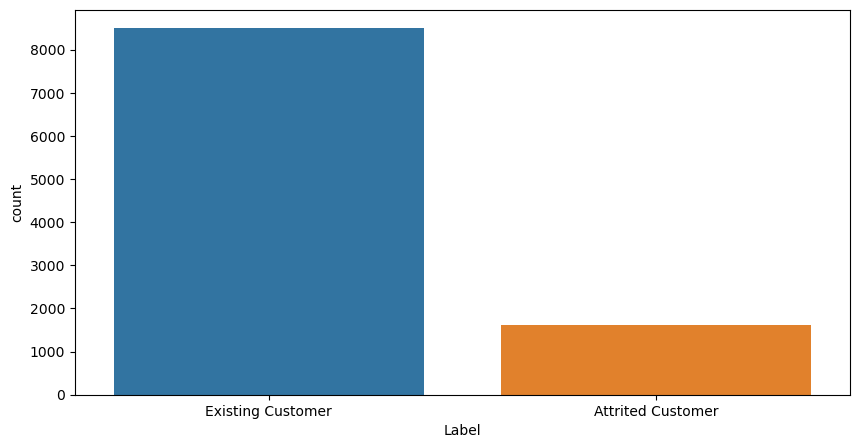

In [127]:
sns.countplot(x = df['Label'],data = df)

#### 3.2.Customer_Age

<Axes: xlabel='Customer_Age', ylabel='count'>

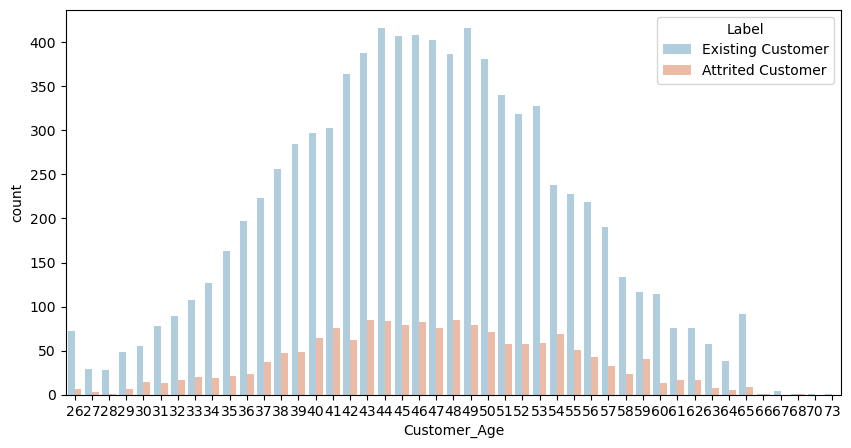

In [128]:
plt.figure(figsize=(10,5))
sns.countplot(x ='Customer_Age', hue = 'Label', data = df, palette = "RdBu_r")

## 3.3. Gender

<Axes: xlabel='Gender', ylabel='count'>

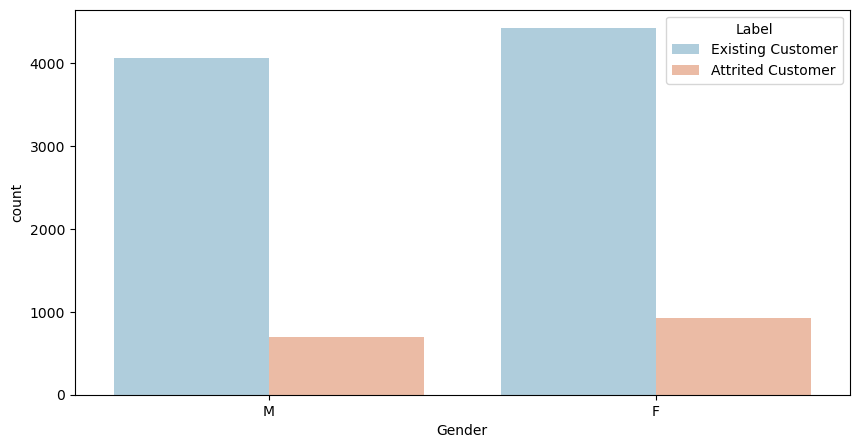

In [129]:
plt.figure(figsize=(10,5))
sns.countplot(x ='Gender', hue = 'Label', data = df, palette = "RdBu_r")

In [ ]:
=> Tỷ lệ nữ rời bỏ cao hơn nam

##### 3.5.Dependent_count


<Axes: xlabel='Education_Level', ylabel='count'>

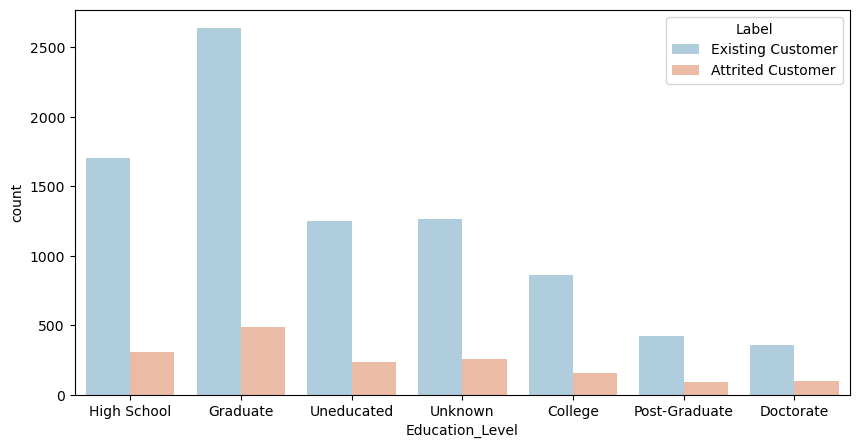

In [130]:
plt.figure(figsize=(10,5))
sns.countplot(x ='Education_Level', hue = 'Label', data = df, palette = "RdBu_r")

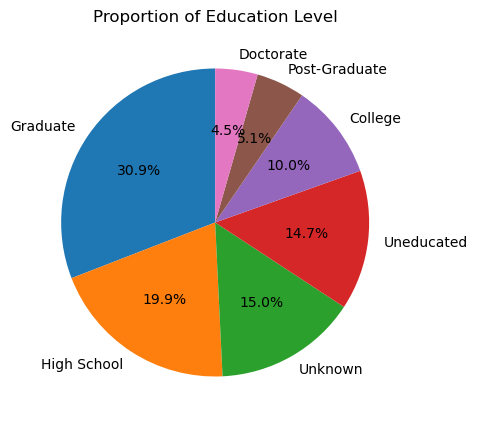

In [131]:
education_counts = df['Education_Level'].value_counts()
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Education Level')
plt.gca().set_aspect('equal') 

##### 3.6. Marital_Status

<Axes: xlabel='Marital_Status', ylabel='count'>

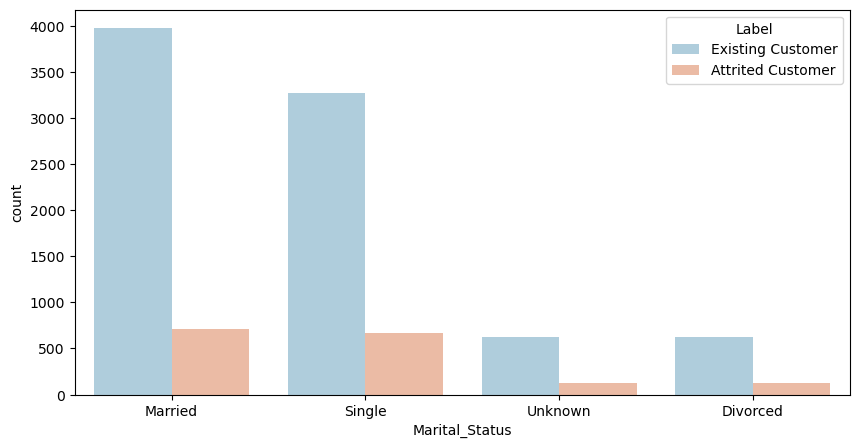

In [132]:
plt.figure(figsize=(10,5))
sns.countplot(x ='Marital_Status', hue = 'Label', data = df, palette = "RdBu_r")

=> Lượng khách hàng sử dụng thẻ tín dụng chủ yếu là Married 
Số lượng khách hàng rời bỏ married và single có tỷ lệ ngang nhau

#### 3.7.Income_Category

<Axes: xlabel='Income_Category', ylabel='count'>

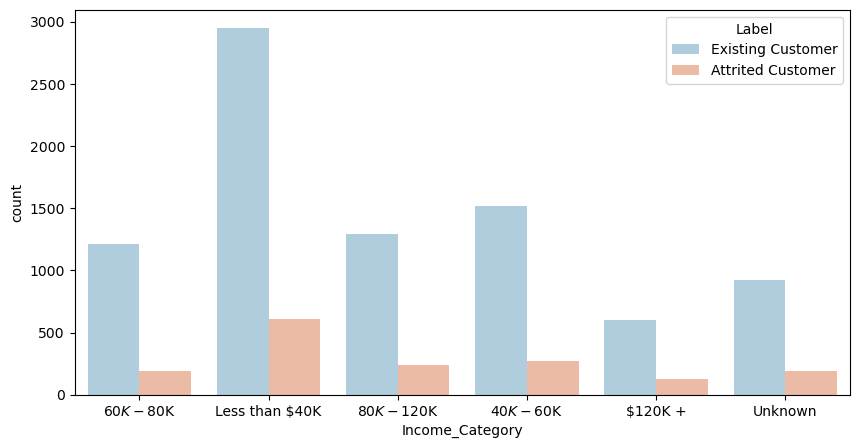

In [133]:
plt.figure(figsize=(10,5))
sns.countplot(x ='Income_Category', hue = 'Label', data = df, palette = "RdBu_r")

### 3.8.Card_Category

<Axes: xlabel='Card_Category', ylabel='count'>

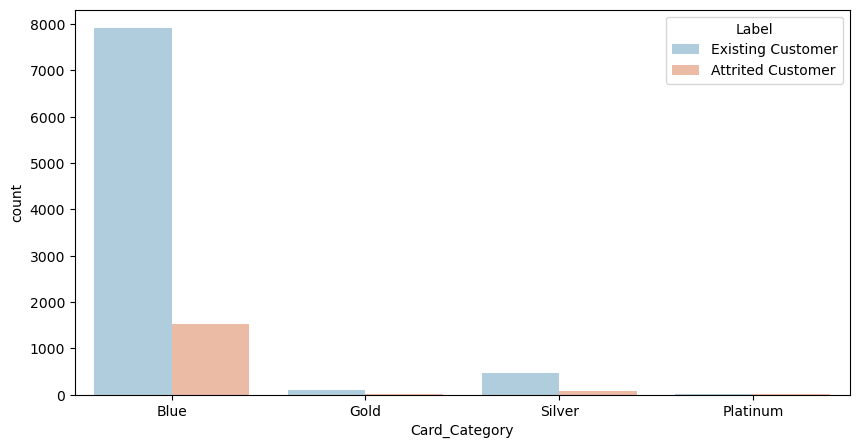

In [134]:
plt.figure(figsize=(10,5))
sns.countplot(x ='Card_Category', hue = 'Label', data = df, palette = "RdBu_r")

=> Loại thẻ được sử dụng nhiều nhất là Blue

#### 3.9.Months_on_book	

<Axes: xlabel='Months_on_book', ylabel='count'>

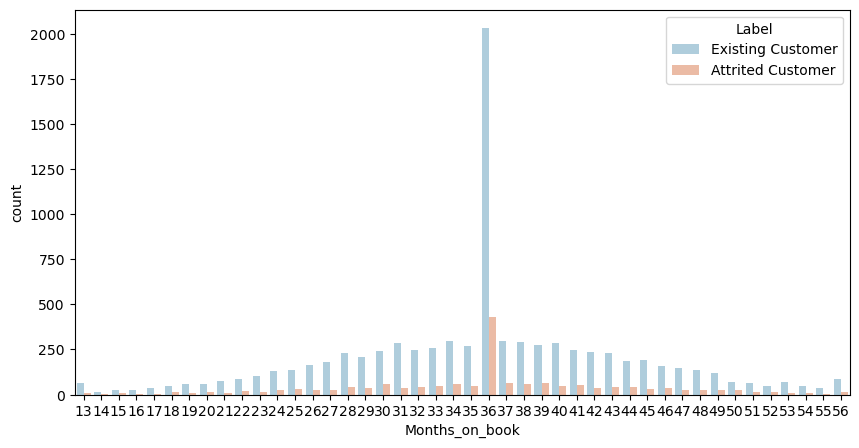

In [135]:
plt.figure(figsize=(10,5))
sns.countplot(x ='Months_on_book', hue = 'Label', data = df, palette = "RdBu_r")

#### 3.10 .Total_relationship_count

<Axes: xlabel='Total_Relationship_Count', ylabel='count'>

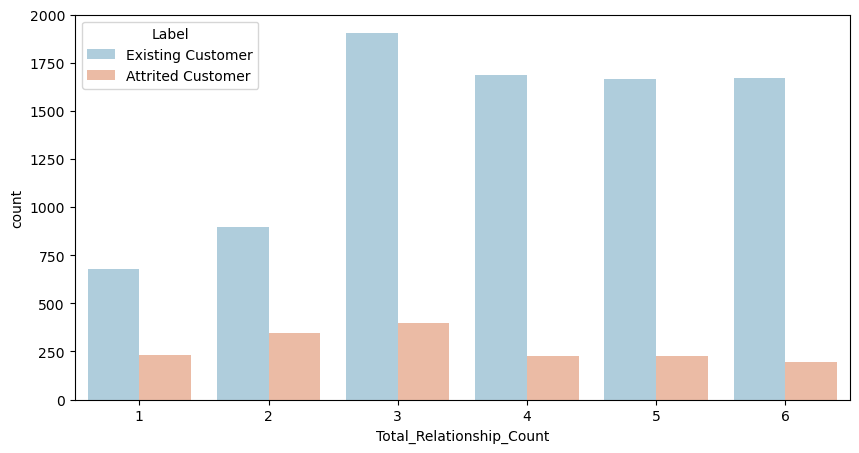

In [136]:
plt.figure(figsize=(10,5))
sns.countplot(x ='Total_Relationship_Count', hue = 'Label', data = df, palette = "RdBu_r")

#### 3.11.Months_Inactive_12_mon	

<Axes: xlabel='Months_Inactive_12_mon', ylabel='count'>

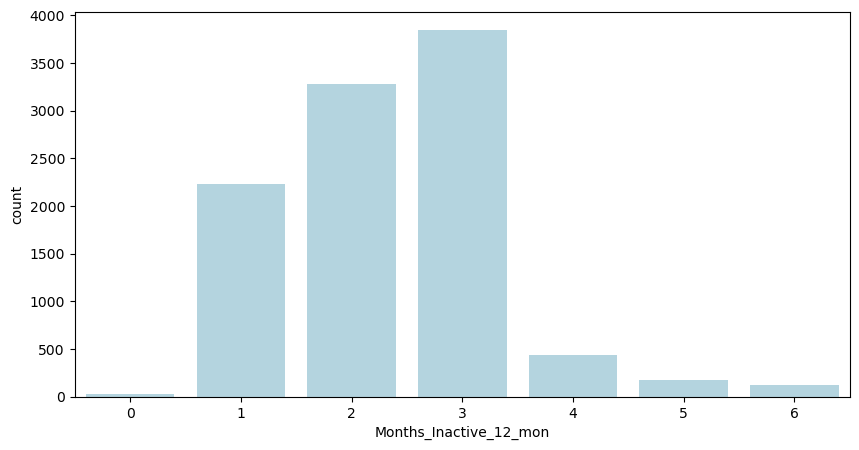

In [137]:
plt.figure(figsize=(10,5))
sns.countplot(x ='Months_Inactive_12_mon', data = df, color= "lightblue")

<Axes: xlabel='Contacts_Count_12_mon', ylabel='count'>

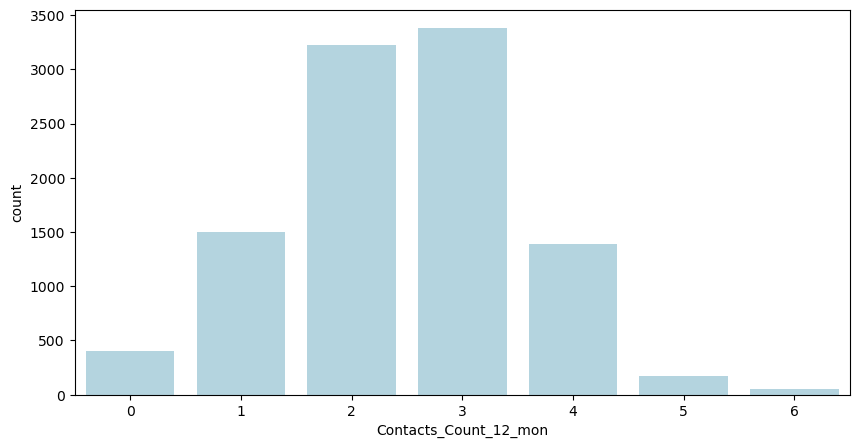

In [138]:
plt.figure(figsize=(10,5))
sns.countplot(x ='Contacts_Count_12_mon', data = df, color= "lightblue")

#### 3.9.Credit_Limit

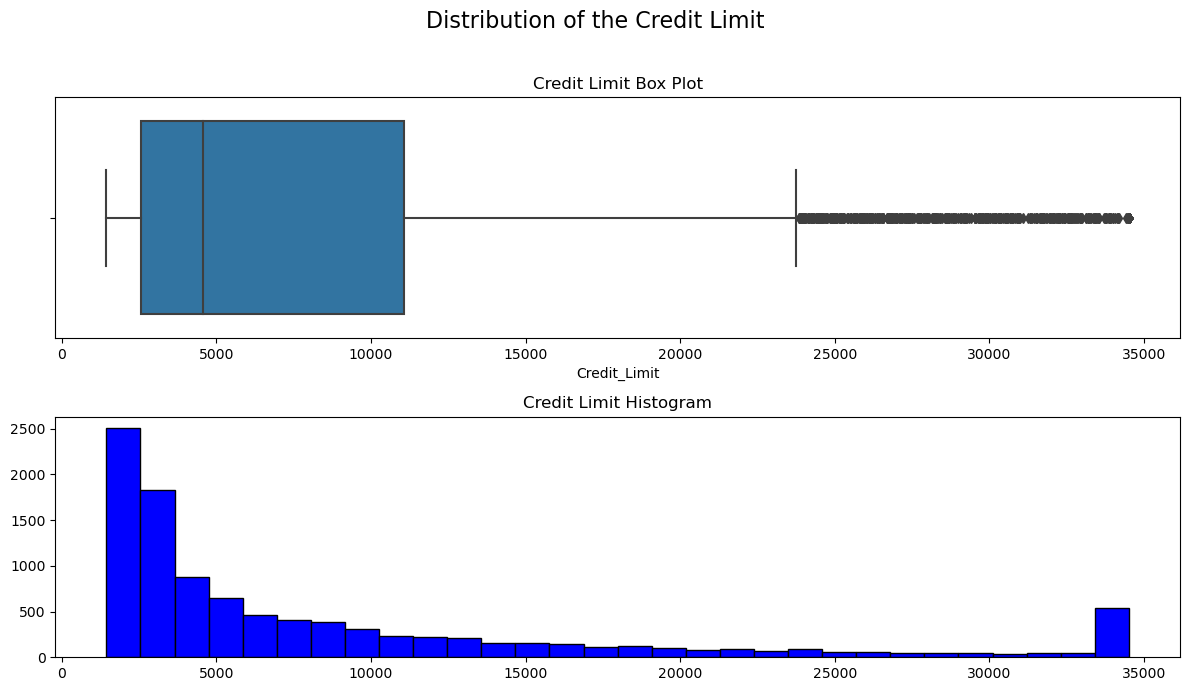

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 7))

sns.boxplot(x=df['Credit_Limit'], ax=ax1)
ax1.set_title('Credit Limit Box Plot')

ax2.hist(df['Credit_Limit'], bins=30, color='blue', edgecolor='black')
ax2.set_title('Credit Limit Histogram')

fig.suptitle('Distribution of the Credit Limit', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()


In [ ]:
=> Limit của credit card nằm từ 2500 -> 5000

## 4.Data Processing

In [140]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [141]:
df.dtypes

CLIENTNUM                     int64
Label                        object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [142]:
# make a copy dataframe
df_cln = df.copy()
df_cln.head()

,CLIENTNUM,Label,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [143]:
df_cln['Label'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Label, dtype: int64

### Xử lý missing values! 

In [144]:
for col in df_cln.columns:
    print(col)
    print(df_cln[col].unique())


CLIENTNUM
[768805383 818770008 713982108 ... 716506083 717406983 714337233]
Label
['Existing Customer' 'Attrited Customer']
Customer_Age
[45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
Gender
['M' 'F']
Dependent_count
[3 5 4 2 0 1]
Education_Level
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status
['Married' 'Single' 'Unknown' 'Divorced']
Income_Category
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category
['Blue' 'Gold' 'Silver' 'Platinum']
Months_on_book
[39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]
Total_Relationship_Count
[5 6 4 3 2 1]
Months_Inactive_12_mon
[1 4 2 3 6 0 5]
Contacts_Count_12_mon
[3 2 0 1 4 5 6]
Credit_Limit
[12691.  8256.  3418. ...  5409.  5281. 10388.]
Total_Revolving_Bal
[ 777  864    0 ... 

In [145]:
df_cln.isna().sum().sum()

0

In [146]:
df_cln.duplicated().sum()

0

In [147]:
df_cln['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [148]:
df_cln['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [149]:
df_cln['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [150]:
# drop the row have unknown value
for i in df_cln.columns:
    df_cln = df_cln[df_cln[i] != 'Unknown']
df_cln.head()

,CLIENTNUM,Label,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


In [151]:
df.shape

(10127, 21)

In [152]:
df_cln.shape

(7081, 21)

In [153]:
# print all object type
columns = df.select_dtypes(exclude = 'number')

for col in columns:
    print(col)
    print(df_cln[col].unique())

Label
['Existing Customer' 'Attrited Customer']
Gender
['M' 'F']
Education_Level
['High School' 'Graduate' 'Uneducated' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status
['Married' 'Single' 'Divorced']
Income_Category
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +']
Card_Category
['Blue' 'Gold' 'Silver' 'Platinum']


In [154]:
# encoder
categories_encoded = {
                     'Label':{'Existing Customer': 0, 'Attrited Customer': 1},
                    'Gender':{'M':1,'F': 2},
                     'Education_Level':{'High School':1, 'Graduate':2 ,'Uneducated':3, 'College':4, 'Post-Graduate':5, 'Doctorate':6},
                    'Marital_Status':{'Married':1, 'Single':2, 'Divorced':3},
                    'Income_Category':{'$60K - $80K':1,'Less than $40K':2, '$80K - $120K':3, '$40K - $60K':4, '$120K +':5},
                    'Card_Category': {'Blue':1, 'Gold':2, 'Silver':3, 'Platinum':4}
}
df_enc = df_cln.replace(categories_encoded)
df_enc.head()

,CLIENTNUM,Label,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,1,3,1,1,1,1,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,2,5,2,2,2,1,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,1,3,2,1,3,1,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,709106358,0,40,1,3,3,1,1,1,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,0,44,1,2,2,1,4,1,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


In [155]:
df_enc['Label'].value_counts()

0    5968
1    1113
Name: Label, dtype: int64

In [156]:
df_enc.dtypes

CLIENTNUM                     int64
Label                         int64
Customer_Age                  int64
Gender                        int64
Dependent_count               int64
Education_Level               int64
Marital_Status                int64
Income_Category               int64
Card_Category                 int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

<Axes: >

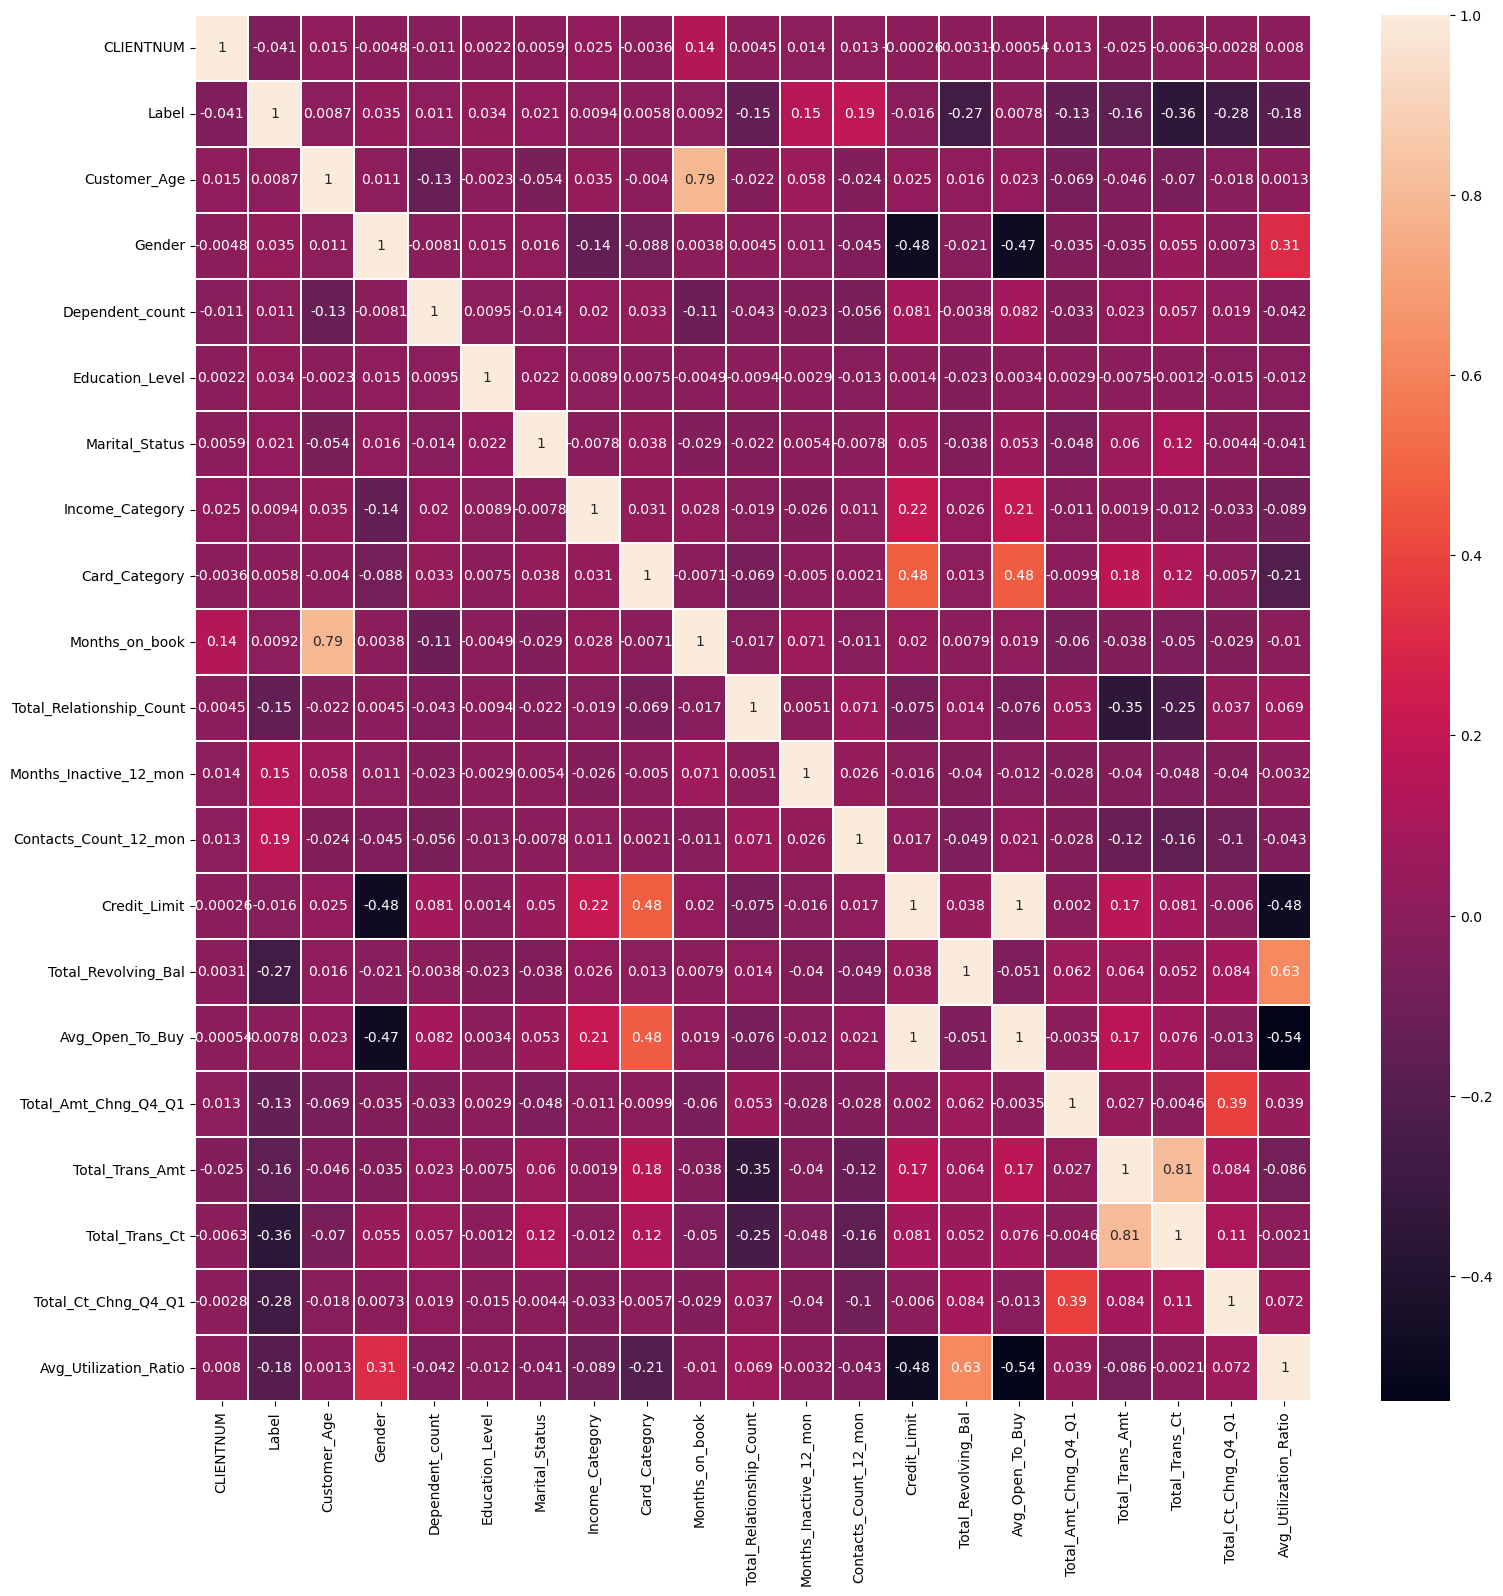

In [157]:
# heatmap
plt.subplots(figsize = (18,18))
sns.heatmap(df_enc.corr(), annot = True, linewidths = 0.2)

<Axes: xlabel='Customer_Age', ylabel='count'>

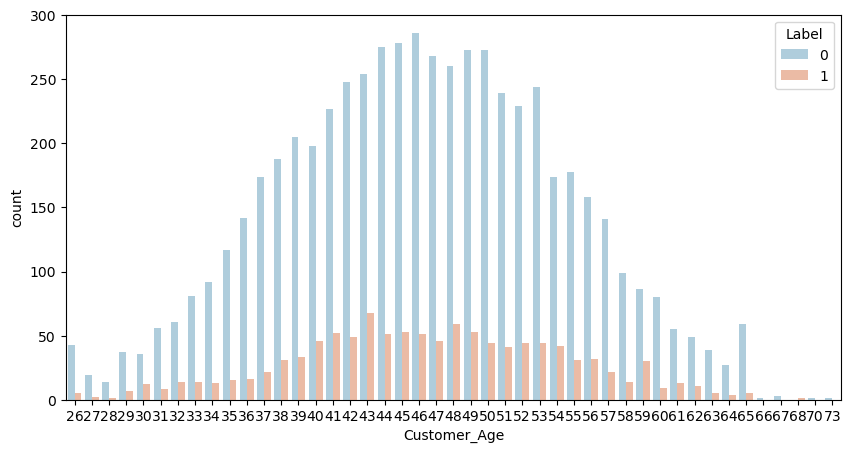

In [158]:
plt.figure(figsize=(10,5))
sns.countplot(x ='Customer_Age', hue = 'Label', data = df_enc, palette = "RdBu_r")

<Axes: xlabel='Label', ylabel='Customer_Age'>

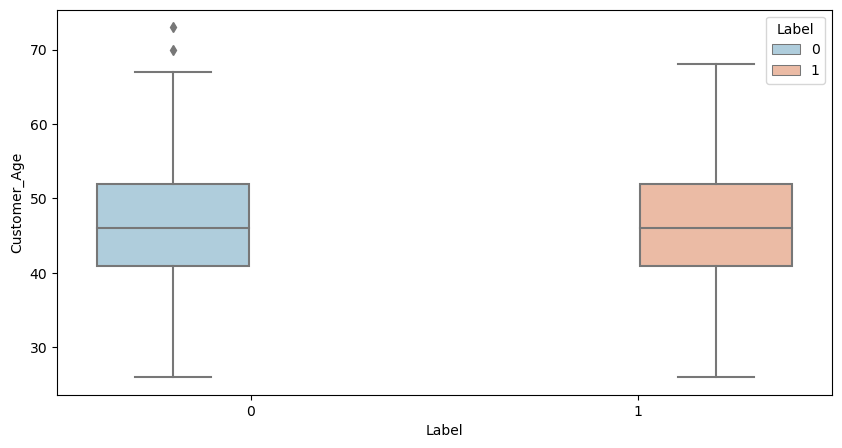

In [159]:
sns.boxplot(x = 'Label', y = 'Customer_Age', hue = 'Label', palette = 'RdBu_r', data = df_enc)

<Axes: xlabel='Months_on_book', ylabel='count'>

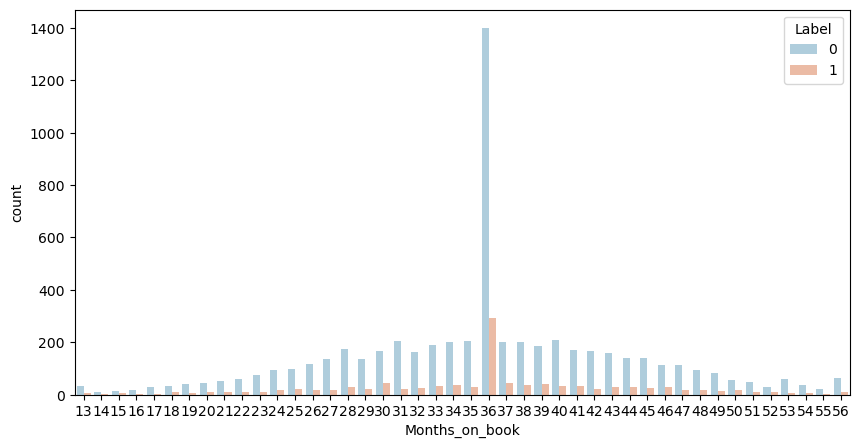

In [160]:
# With Months_on_book
plt.figure(figsize = (10,5))
sns.countplot(x = 'Months_on_book', hue ='Label', data = df_enc, palette = 'RdBu_r')

<Axes: xlabel='Label', ylabel='Months_on_book'>

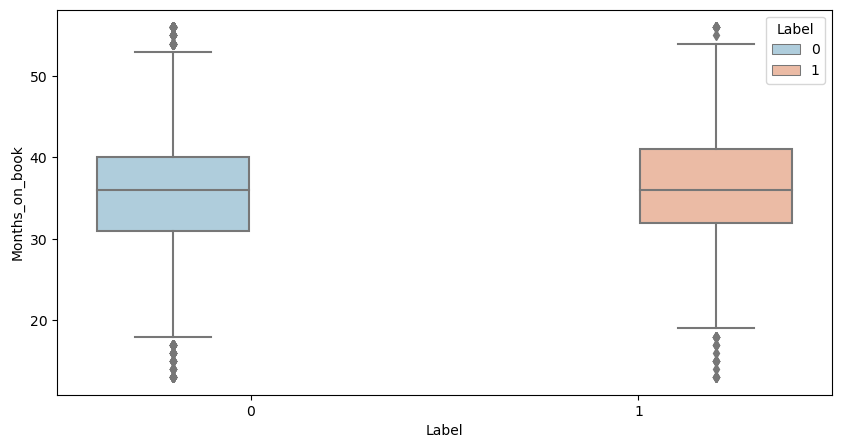

In [161]:
sns.boxplot(x = 'Label', y ='Months_on_book', hue = 'Label', palette = 'RdBu_r', data = df_enc)

<Axes: xlabel='Total_Relationship_Count', ylabel='count'>

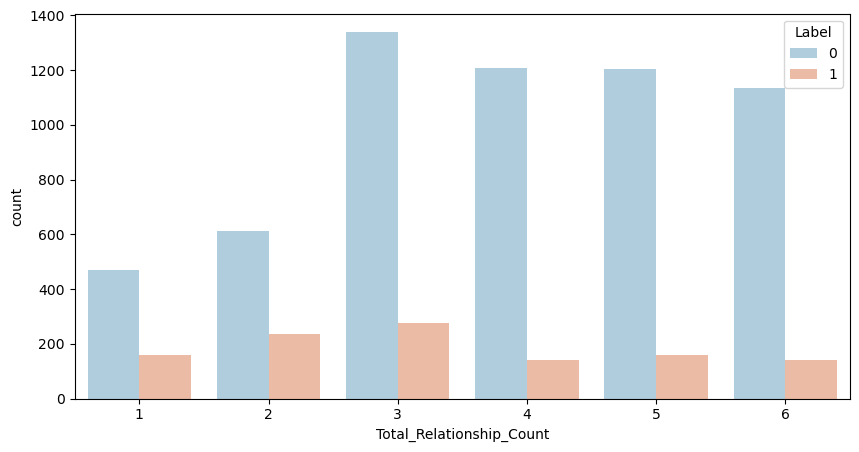

In [162]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Total_Relationship_Count', hue = "Label", data = df_enc, palette = 'RdBu_r')

# Phân tích nguyên nhân dẫn đến Churn

#### Tạo ra bức tranh chân dung khách hàng 
#### Phân tích dữ liệu liên quan đến nhân khẩu học: Age, Gender, Income, Education Level, Marital Status,, Occupation, Geographic Location, Nationality, Ethnicity, Religion, Family Size

In [163]:
num_cols = list(df_cln.select_dtypes(['int64','float64']))
cat_cols = list(df_cln.select_dtypes(['object']))

In [164]:
cat_cols

['Label',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [253]:
# encoder label
categories_encoded = {'Label':{'Existing Customer': 0, 'Attrited Customer': 1}}
df_encl = df_cln.replace(categories_encoded)
df_encl.head()

,CLIENTNUM,Label,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,0,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


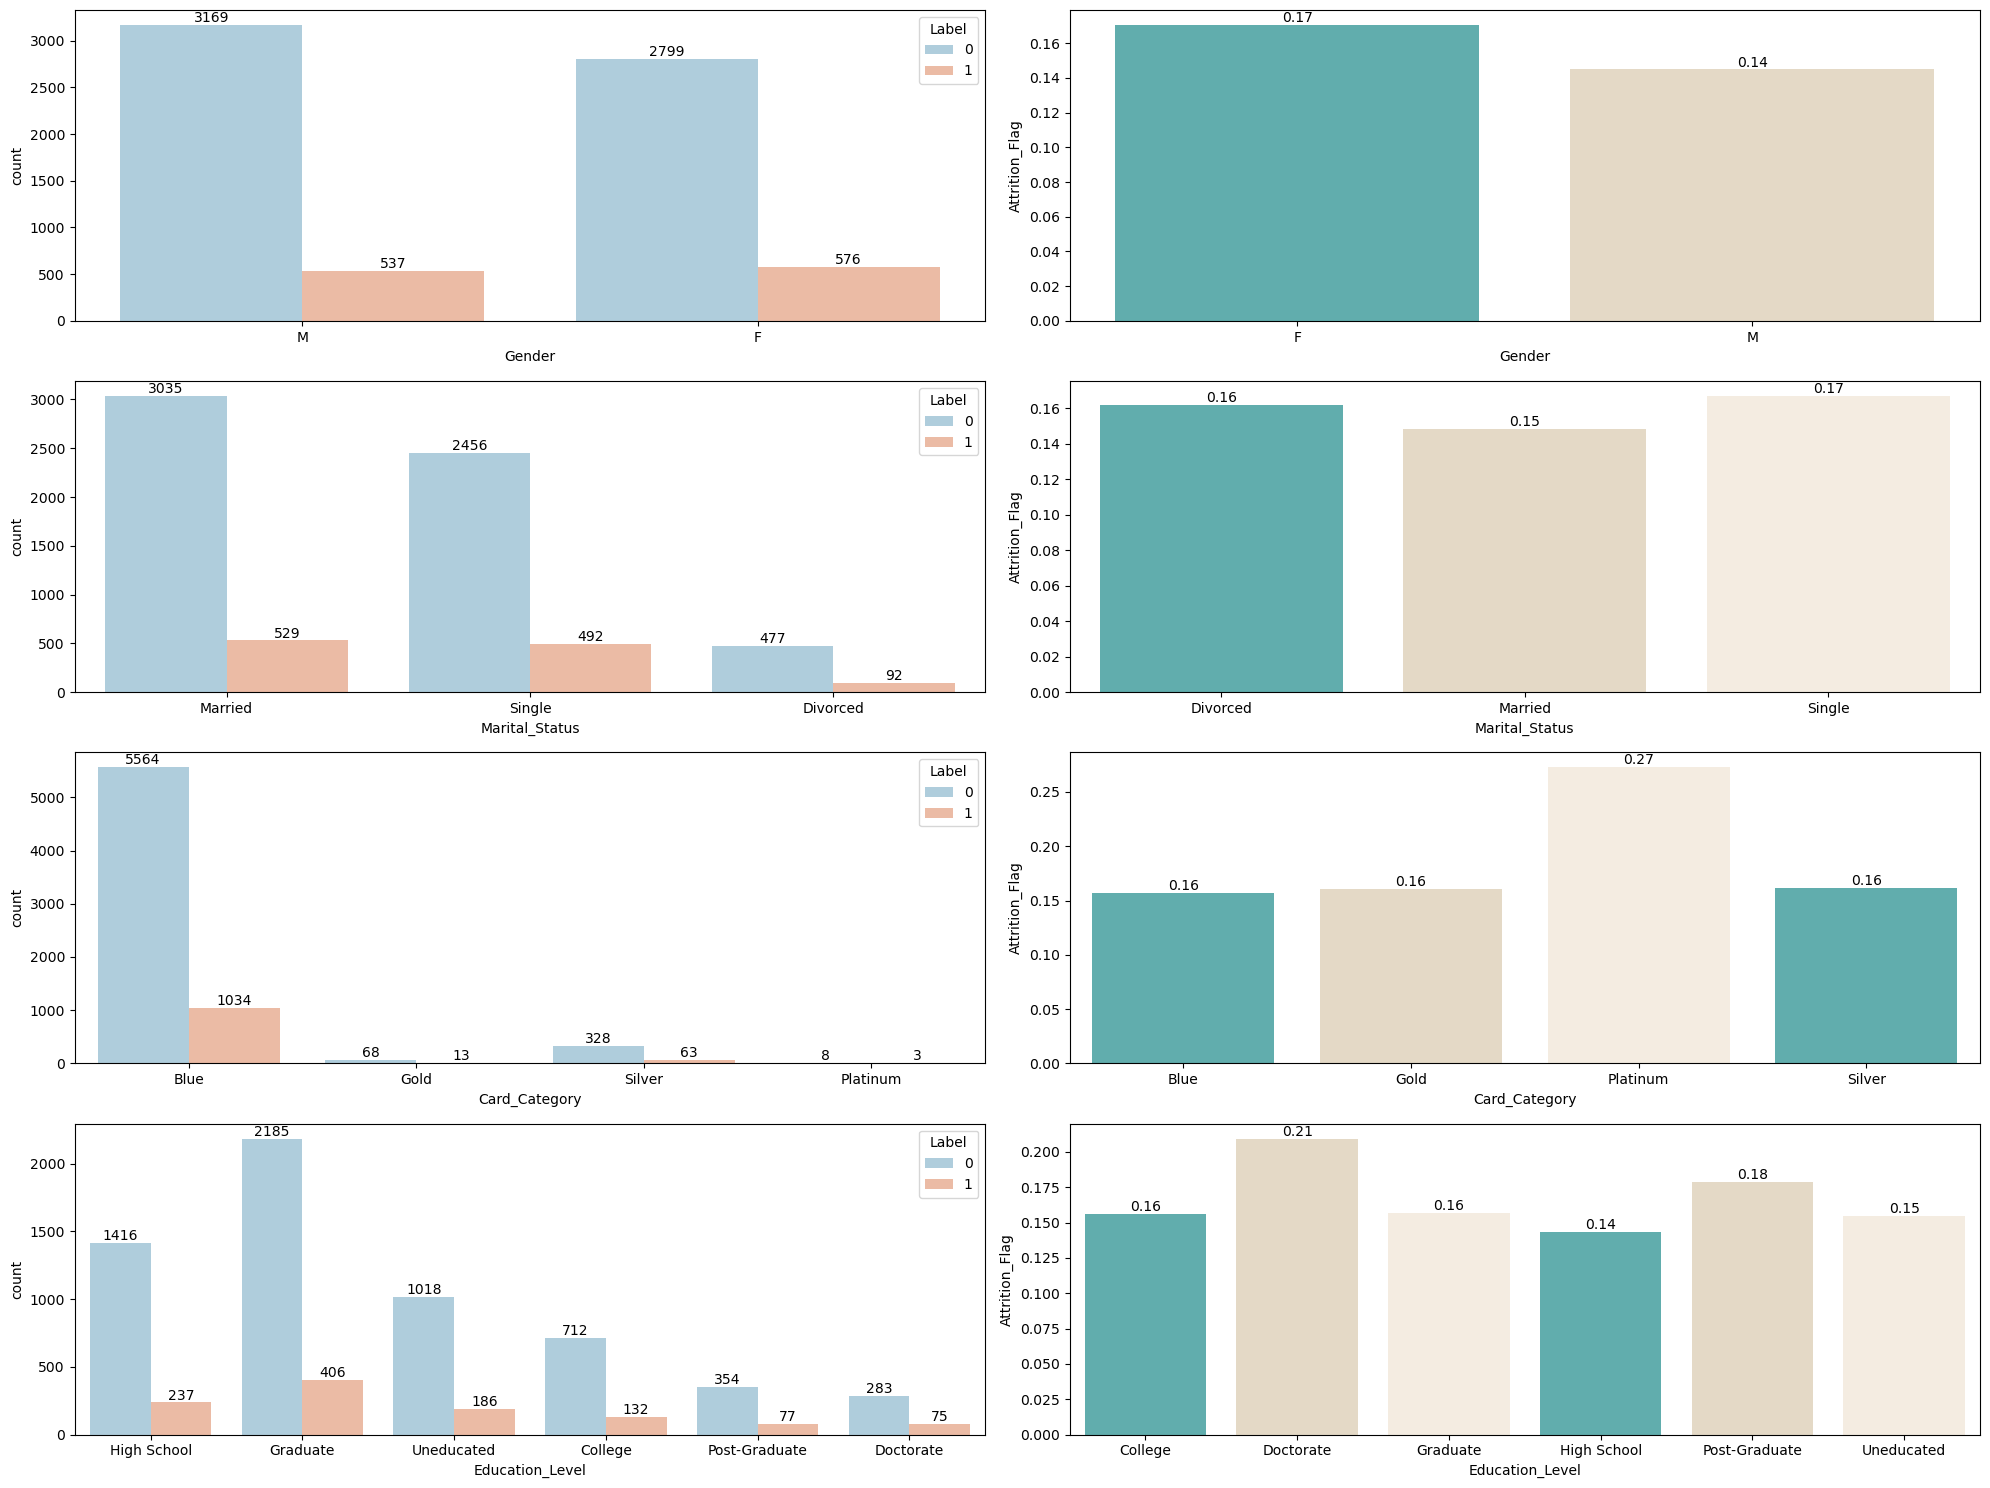

In [231]:
columns = ['Gender', 'Marital_Status', 'Card_Category','Education_Level']

fig, axes = plt.subplots(len(columns), 2, figsize=(20, 15))

for i, col in enumerate(columns):
    
    # Vẽ countplot
    ax1 = sns.countplot(x=col, hue='Label', data=df_encl, palette="RdBu_r", ax=axes[i, 0])
    for p in ax1.patches:
        ax1.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 5), textcoords='offset points')
    
    # Vẽ barplot
    df_group_mean = df_encl.groupby([col]).agg(Attrition_Flag=('Label', 'mean')).reset_index()
    ax2 = sns.barplot(data=df_group_mean, x=col, y='Attrition_Flag', fill=True, alpha=1, errorbar=None, 
                      palette=('#54BAB9', '#E9DAC1','#F7ECDE'), ax=axes[i, 1])
    for p in ax2.patches:
        ax2.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 5), textcoords='offset points')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [186]:
!pip install squarify

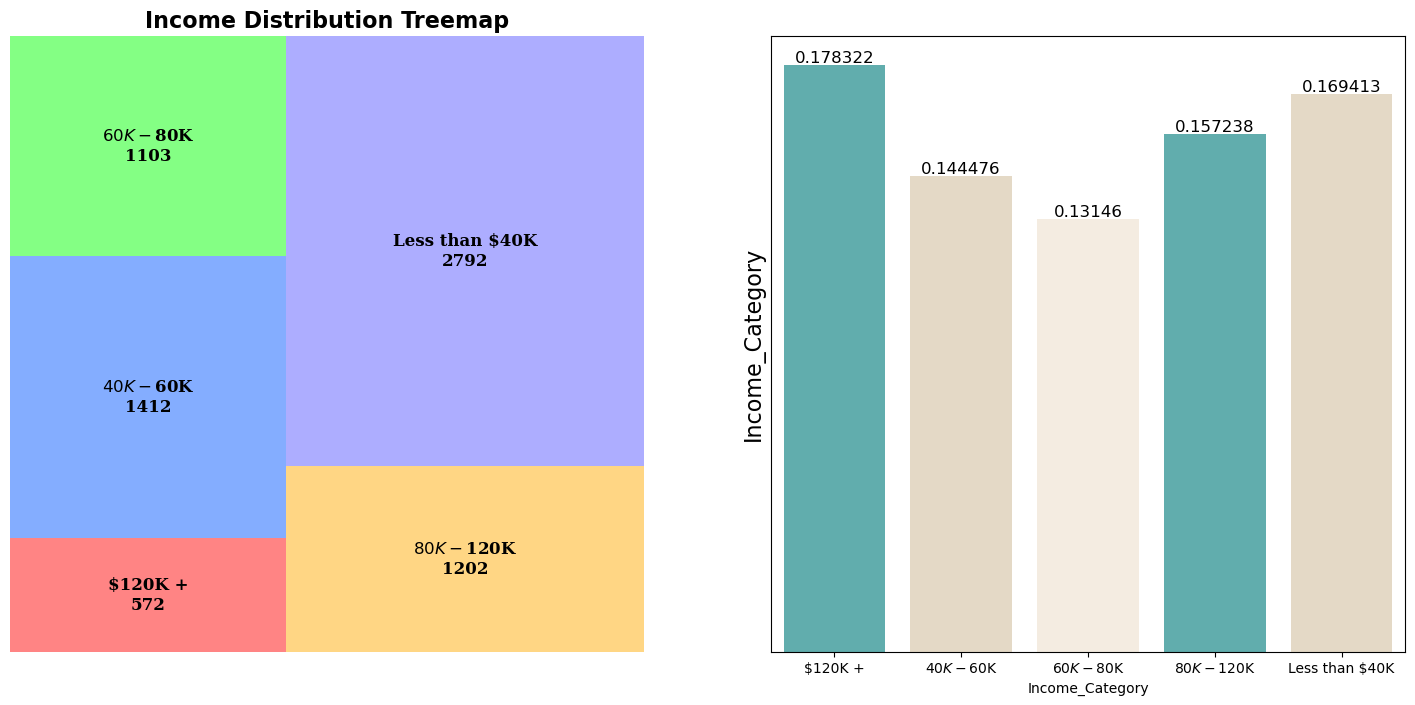

In [214]:
import squarify


df_group = df_encl.groupby(['Income_Category']).agg(num_user=('CLIENTNUM', 'count')).reset_index()

labels = df_group['Income_Category']


sizes = df_group['num_user']
colors = ['#ff6666', '#6699ff', '#66ff66', '#ffcc66', '#9999ff', '#ff99cc']

labels_with_sizes = [f'{label}\n{size}' for label, size in zip(labels, sizes)]

fig, ax = plt.subplots(1, 2, figsize=(18, 8))

squarify.plot(sizes=sizes, label=labels_with_sizes, color=colors, ax=ax[0], alpha=.8, text_kwargs={'fontsize':12, 'weight':'bold', 'fontfamily':'serif'})
ax[0].set_title('Income Distribution Treemap', fontsize=16, weight='bold')
ax[0].axis('off')

df_group_mean = df_encl.groupby(['Income_Category']).agg(Label_mean=('Label', 'mean')).reset_index()
sns.barplot(data=df_group_mean, x='Income_Category', y='Label_mean', fill=True, alpha=1, errorbar=None, ax=ax[1], palette=('#54BAB9', '#E9DAC1','#F7ECDE'))

# ax[1].set_xlabel(' ')
# ax[1].set_xlabel(' ')
# ax[1].set_ylabel(' ')
# ax[1].xaxis.set_tick_params(labelsize=14)
ax[1].tick_params(left=False, labelleft=False)
ax[1].set_ylabel('Income_Category', fontsize=16)    
ax[1].bar_label(ax[1].containers[0], size="12")
ax[1].grid(False)

plt.show()

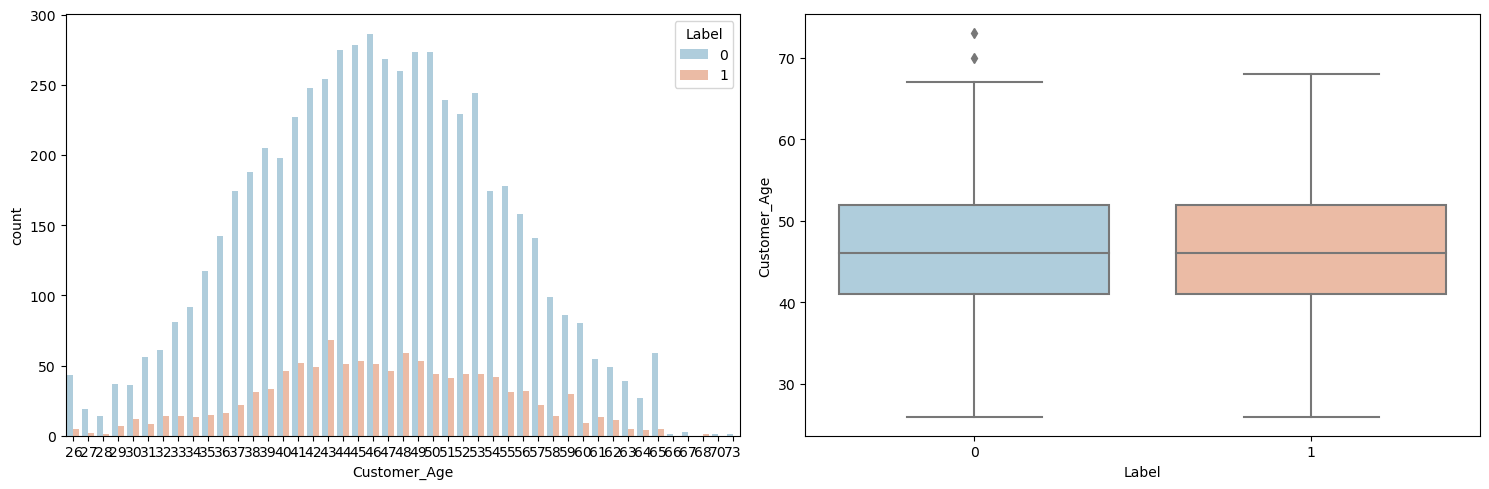

In [216]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Vẽ biểu đồ countplot 
sns.countplot(x='Customer_Age', hue='Label', data=df_encl, palette="RdBu_r", ax=axes[0])

# Vẽ biểu đồ boxplot 
sns.boxplot(data=df_encl, y='Customer_Age', x='Label', palette="RdBu_r", ax=axes[1])

plt.tight_layout()
plt.show()


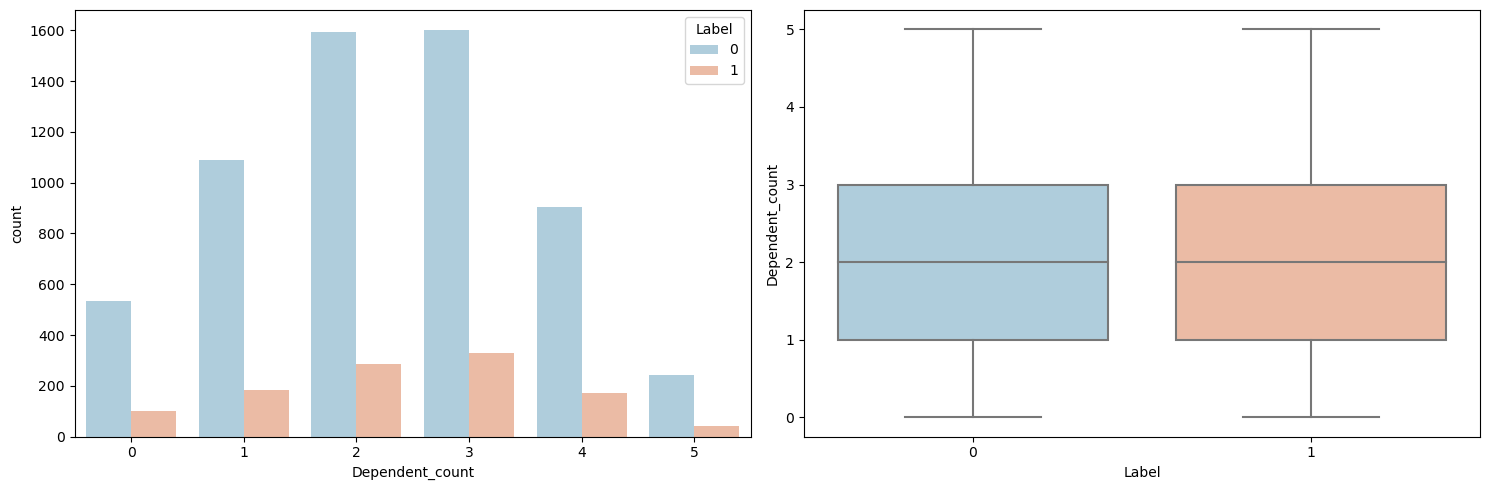

In [218]:
# Dependent_count
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Vẽ biểu đồ countplot 
sns.countplot(x='Dependent_count', hue='Label', data=df_encl, palette="RdBu_r", ax=axes[0])

# Vẽ biểu đồ boxplot 
sns.boxplot(data=df_encl, y='Dependent_count', x='Label', palette="RdBu_r", ax=axes[1])


plt.tight_layout()
plt.show()


### Phân tích qua hành vi sử dụng thẻ tín dụng của khách hàng

<Axes: >

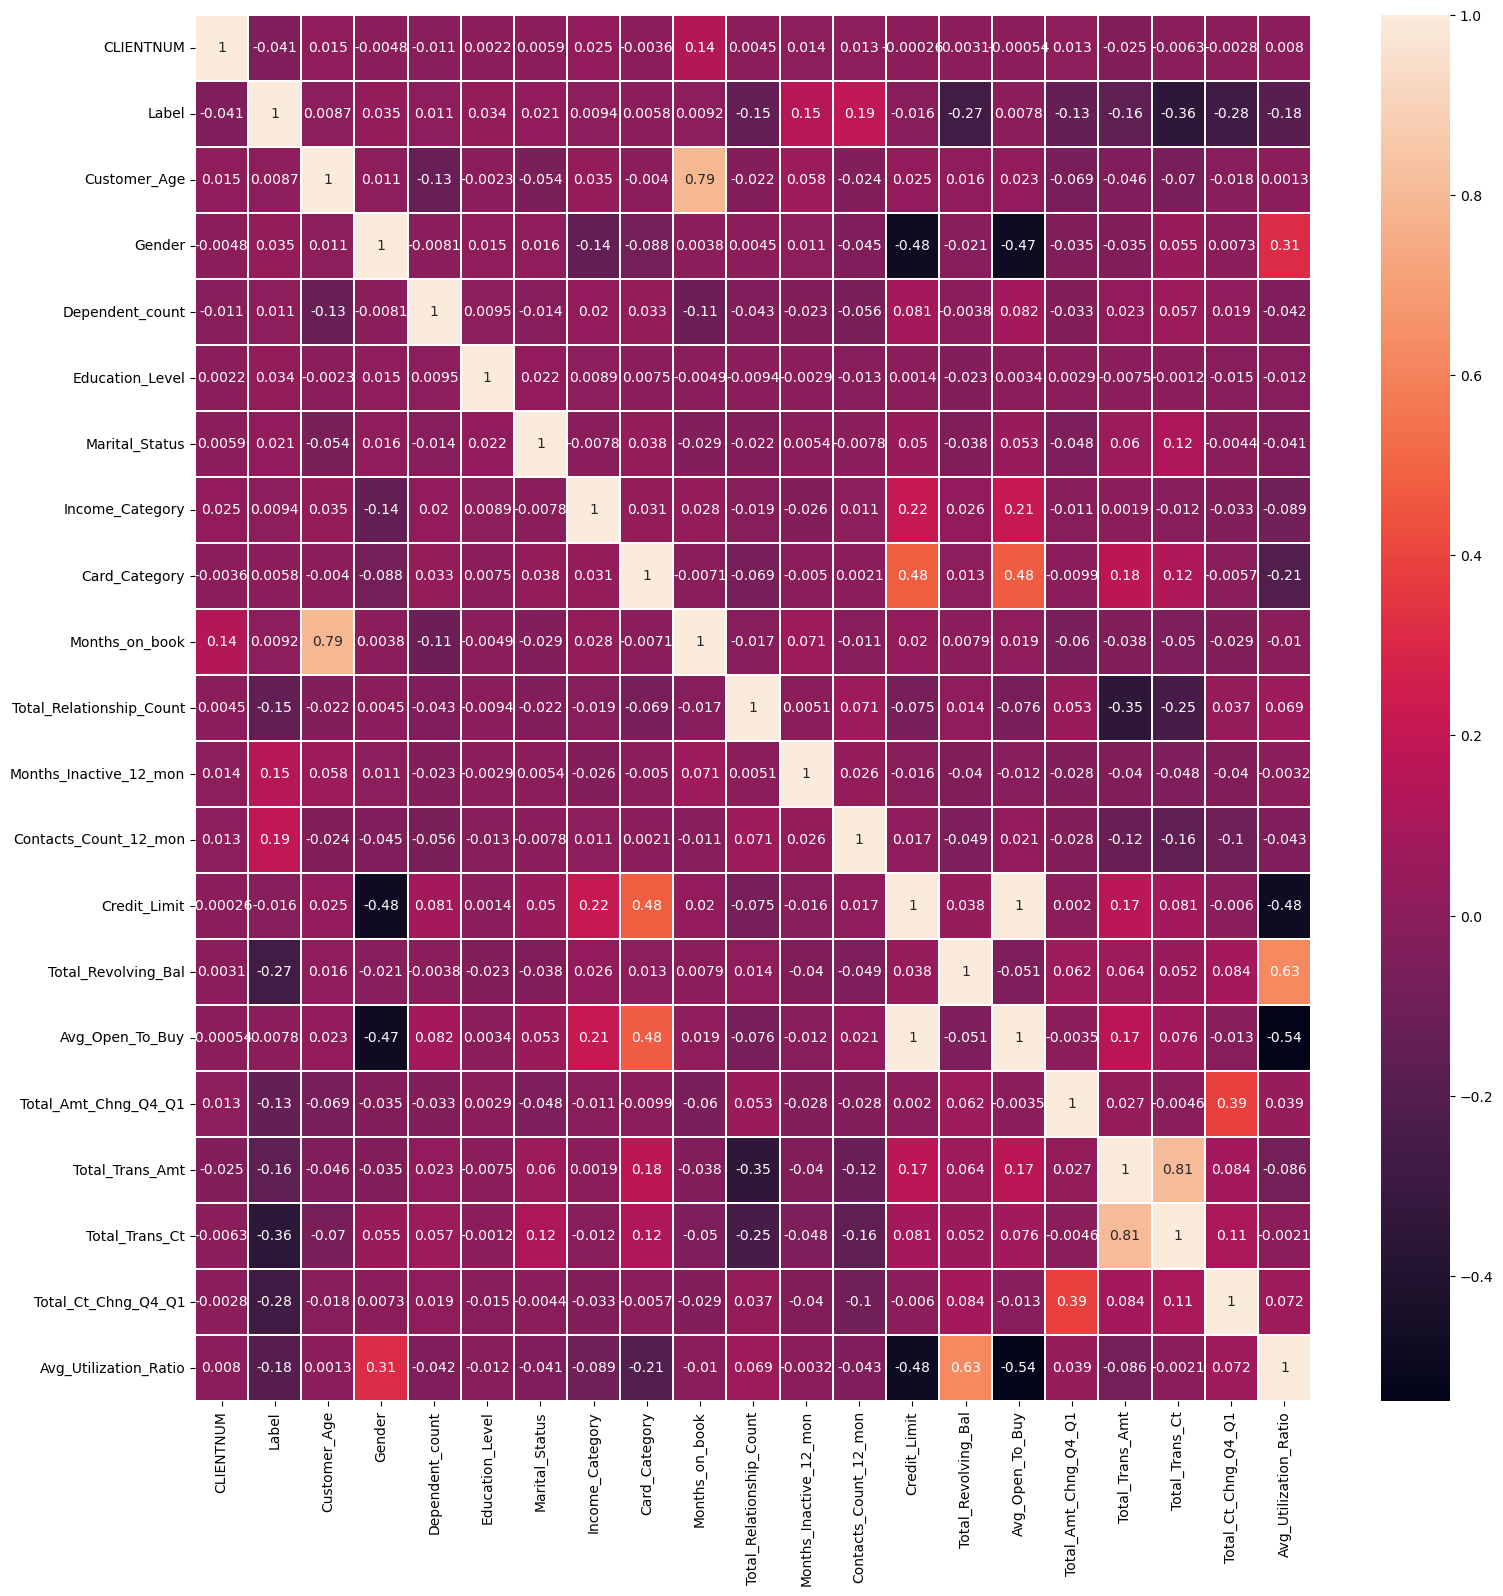

In [220]:
# Tạo heatmap
plt.subplots(figsize = (18,18))
sns.heatmap(df_enc.corr(), annot = True, linewidths = 0.2)

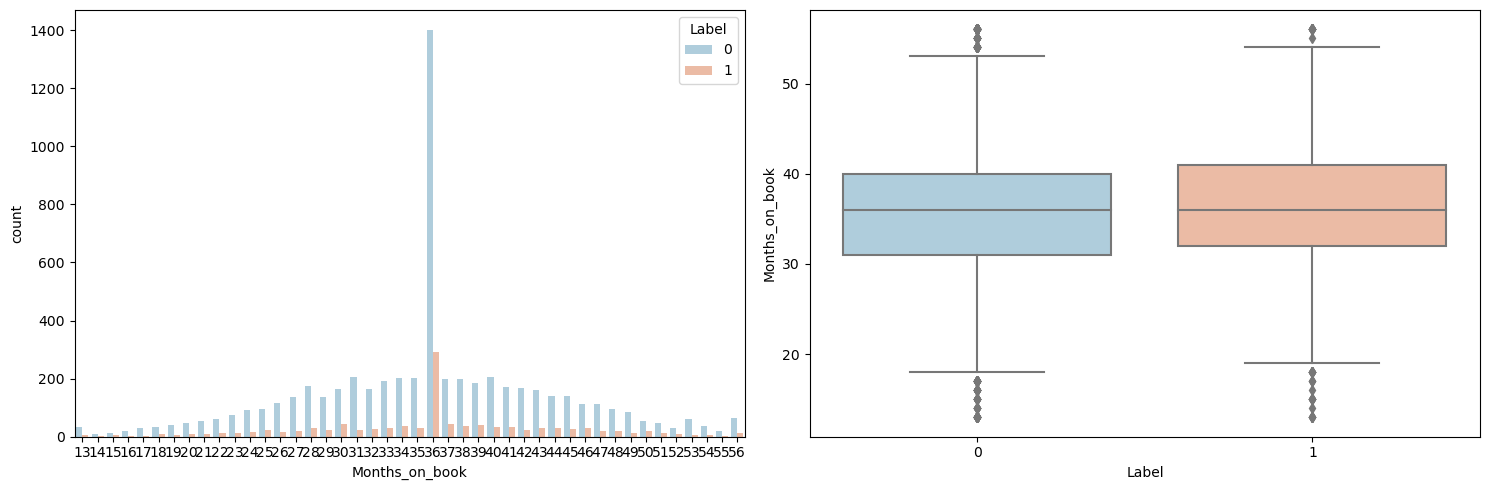

In [222]:
# Dependent_count
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Vẽ biểu đồ countplot 
sns.countplot(x='Months_on_book', hue='Label', data=df_encl, palette="RdBu_r", ax=axes[0])

# Vẽ biểu đồ boxplot 
sns.boxplot(data=df_encl, y='Months_on_book', x='Label', palette="RdBu_r", ax=axes[1])

plt.tight_layout()
plt.show()


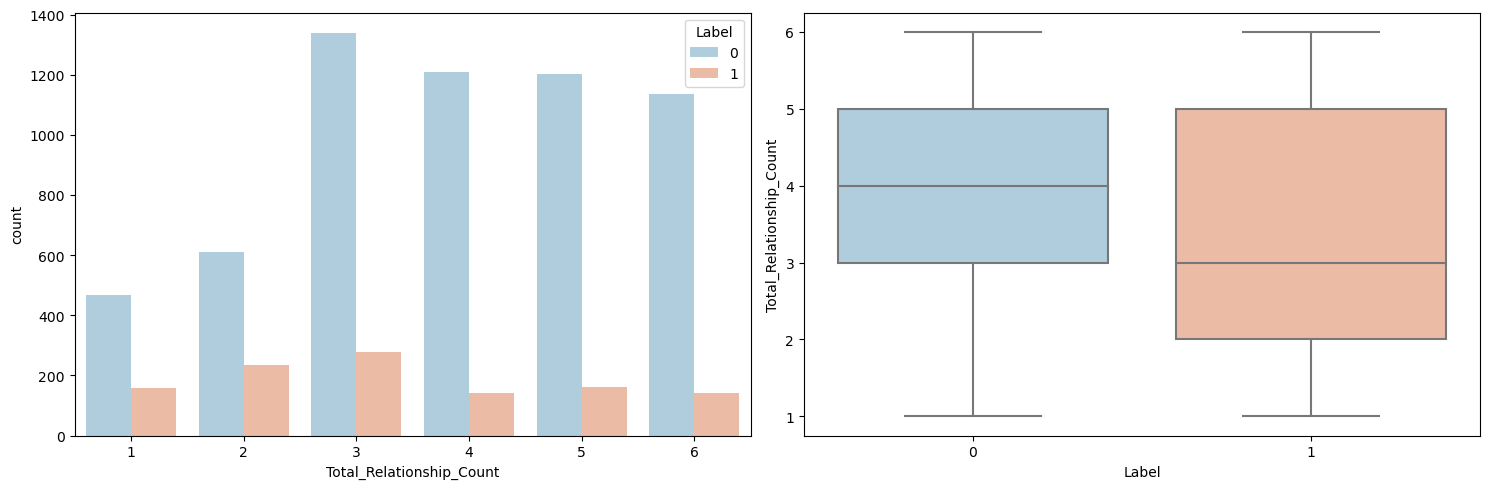

,num_user,num_churn,Churn_rate
Total_Relationship_Count,,,
1,627,158,0.251994
2,848,236,0.278302
3,1617,277,0.171305
4,1350,141,0.104444
5,1363,160,0.117388
6,1276,141,0.110502


In [224]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Vẽ biểu đồ countplot 
sns.countplot(x='Total_Relationship_Count', hue='Label', data=df_encl, palette="RdBu_r", ax=axes[0])

# Vẽ biểu đồ boxplot 
sns.boxplot(data=df_encl, y='Total_Relationship_Count', x='Label', palette="RdBu_r", ax=axes[1])


plt.tight_layout()
plt.show()

df_large_amount = df_encl.groupby("Total_Relationship_Count").agg(num_user=("CLIENTNUM", "count"),num_churn=("Label", "sum"))
df_large_amount["Churn_rate"] = df_large_amount['num_churn']/df_large_amount["num_user"]
df_large_amount

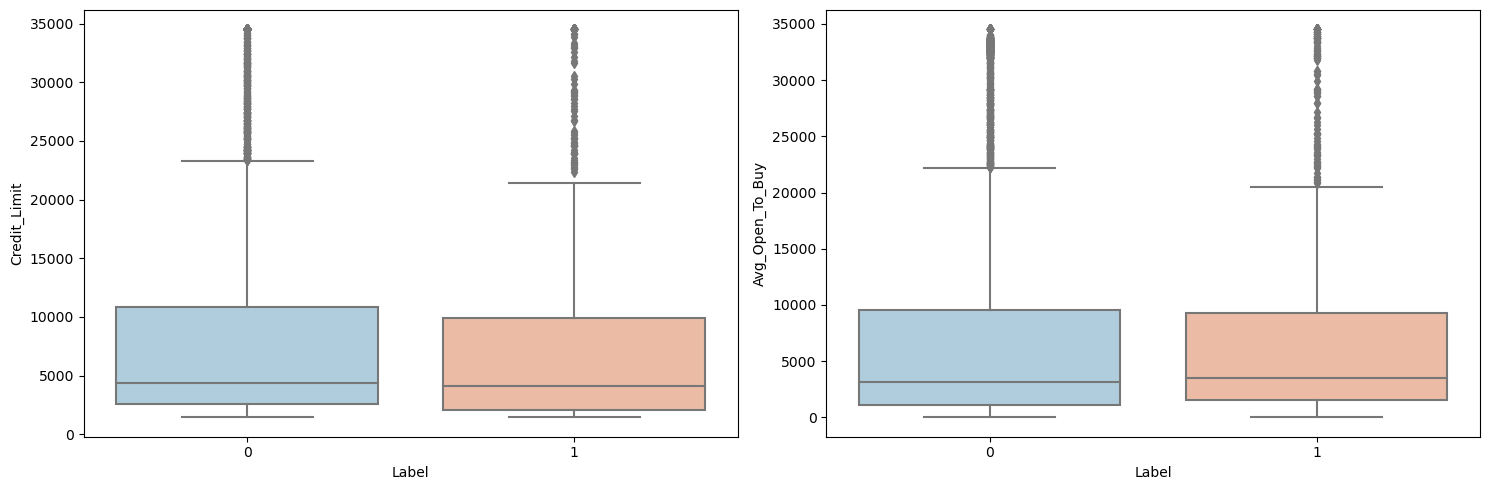

In [226]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=df_encl, y='Credit_Limit', x='Label', palette="RdBu_r", ax=axes[0])

# Vẽ biểu đồ boxplot 
sns.boxplot(data=df_encl, y='Avg_Open_To_Buy', x='Label', palette="RdBu_r", ax=axes[1])

plt.tight_layout()
plt.show()


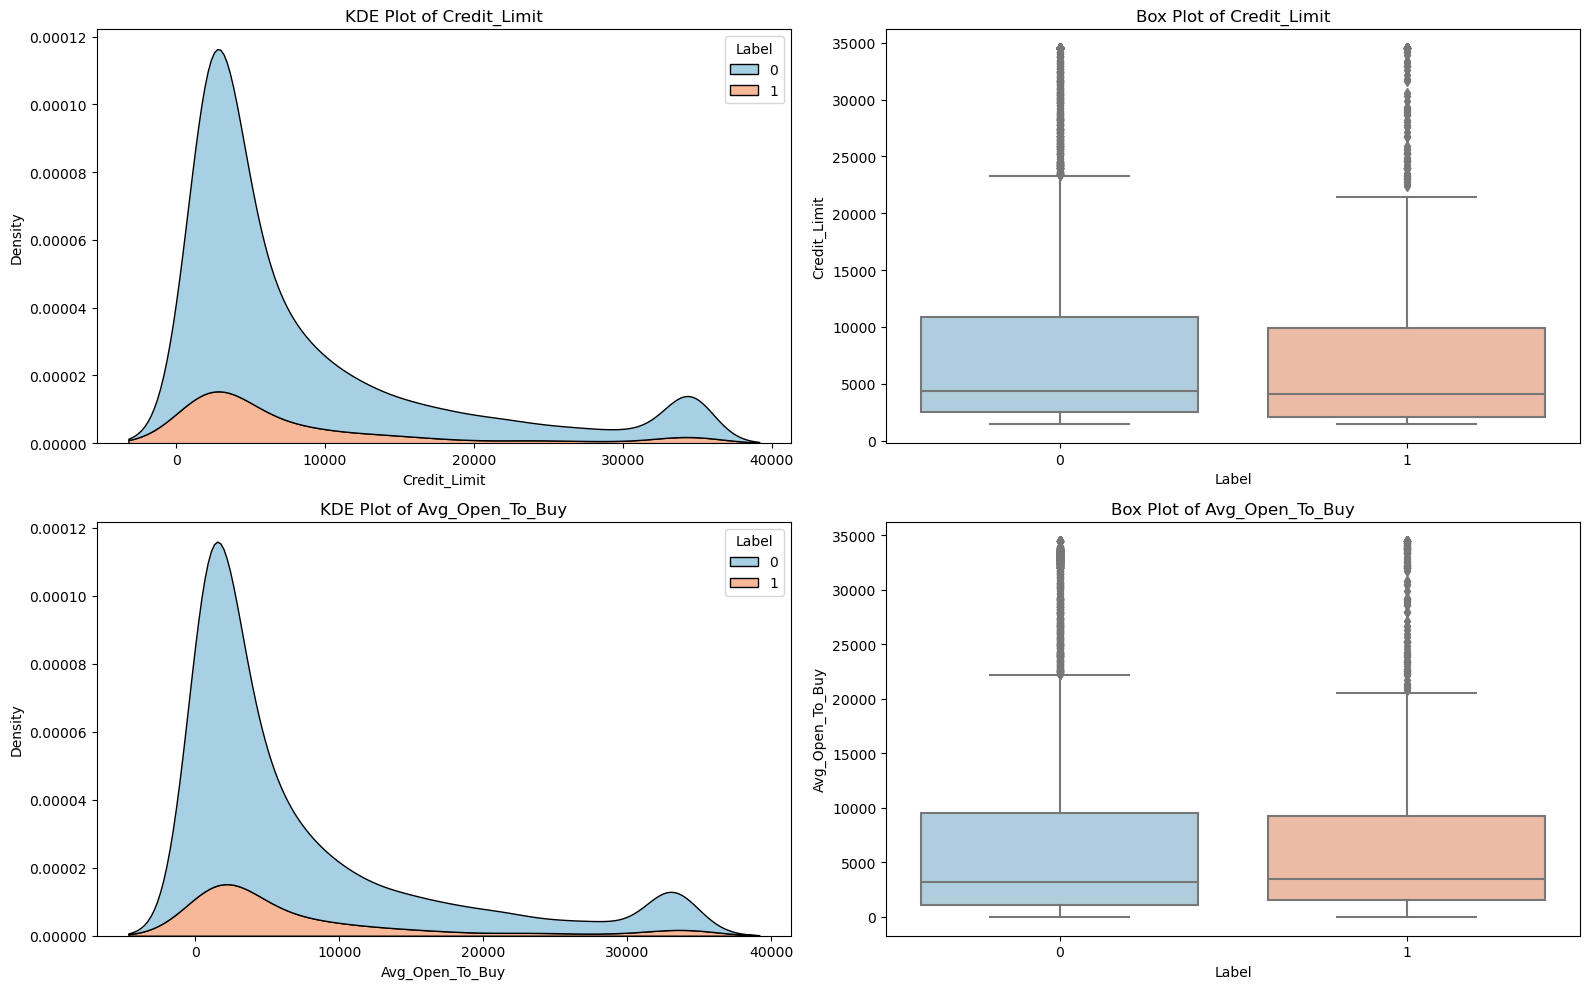

In [232]:

cols_visua = ['Credit_Limit','Avg_Open_To_Buy']

fig, ax = plt.subplots(ncols=2, nrows=len(cols_visua), figsize=(16, 5*len(cols_visua)))
                
df_visual = df_encl.copy()

for i, col in enumerate(cols_visua):
    Q3 = df_encl[cols_visua].quantile(0.99)
    df_encl = df_encl[df_encl[cols_visua] <= Q3]
    Q1 = df_encl[cols_visua].quantile(0.01)
    df_encl = df_encl[df_encl[cols_visua] >= Q1]
    # Vẽ KDE plot
    sns.kdeplot(data=df_visual, x=col, fill=True, alpha=1, 
                hue='Label', palette=("RdBu_r"), multiple='stack', ax=ax[i, 0])
    
    # Vẽ Box plot
    sns.boxplot(data=df_visual, y=col, x='Label', ax=ax[i, 1],
                palette=("RdBu_r"))

# Thiết lập tiêu đề cho mỗi biểu đồ
for i, col in enumerate(cols_visua):
    ax[i, 0].set_title(f'KDE Plot of {col}')
    ax[i, 1].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


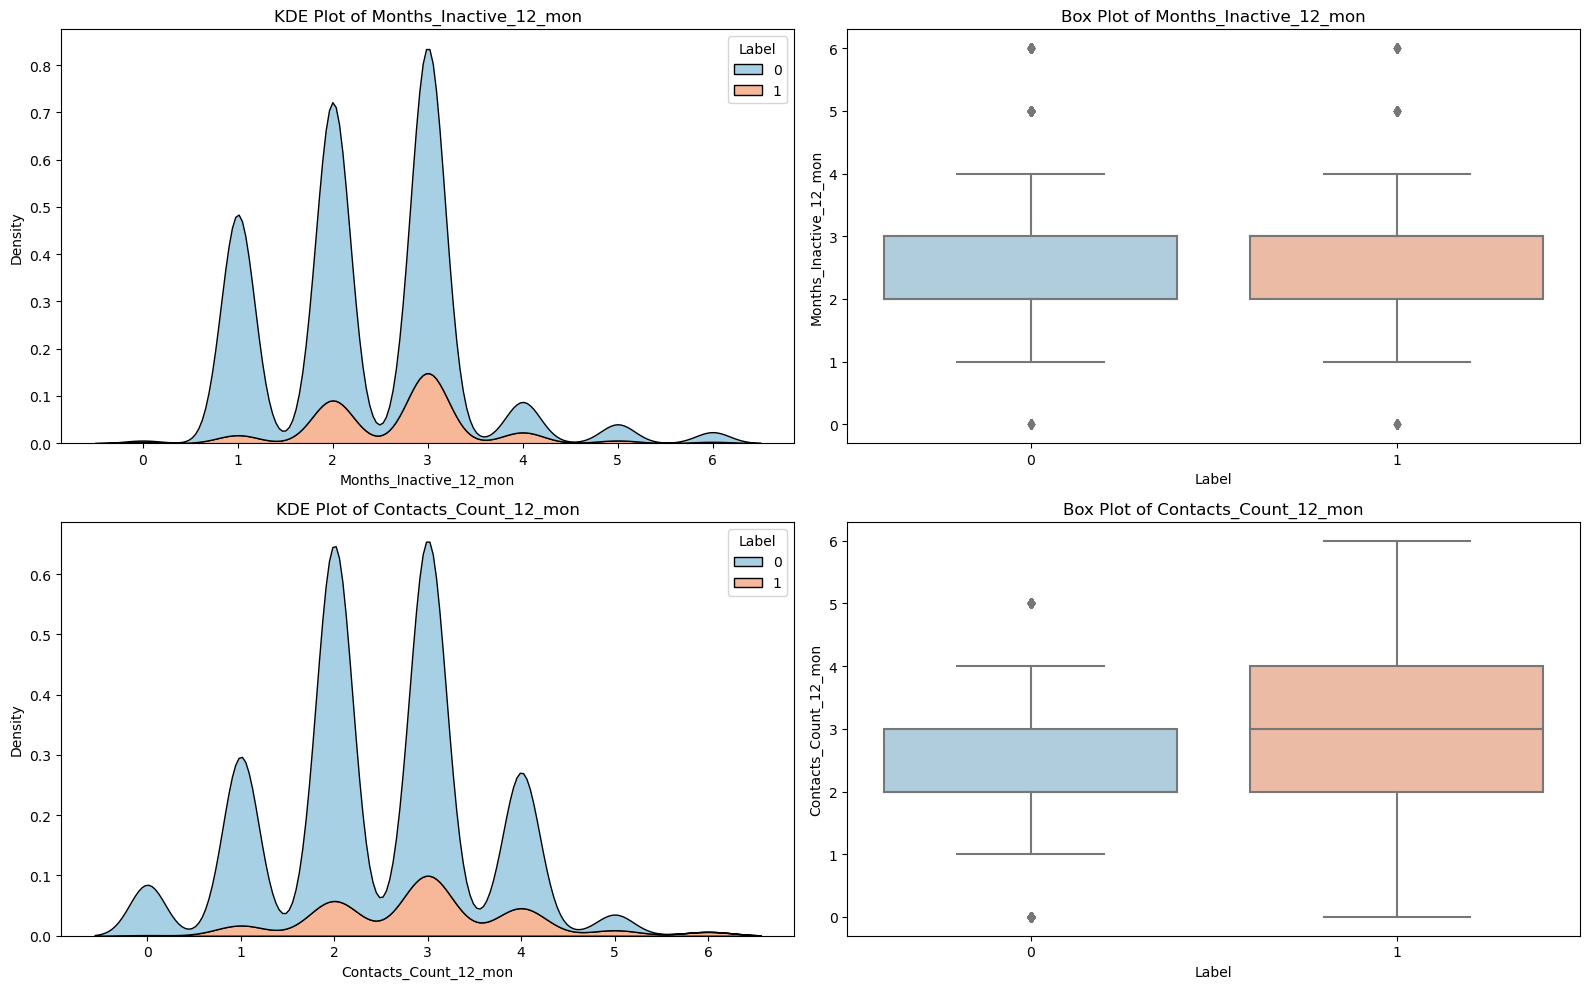

In [249]:

cols_visua = ['Months_Inactive_12_mon','Contacts_Count_12_mon']

fig, ax = plt.subplots(ncols=2, nrows=len(cols_visua), figsize=(16, 5*len(cols_visua)))
                
df_visual = df_encl.copy()

for i, col in enumerate(cols_visua):
    Q3 = df_encl[cols_visua].quantile(0.99)
    df_encl = df_encl[df_encl[cols_visua] <= Q3]
    Q1 = df_encl[cols_visua].quantile(0.01)
    df_encl = df_encl[df_encl[cols_visua] >= Q1]
    # Vẽ KDE plot
    sns.kdeplot(data=df_visual, x=col, fill=True, alpha=1, 
                hue='Label', palette=("RdBu_r"), multiple='stack', ax=ax[i, 0])
    
    # Vẽ Box plot
    sns.boxplot(data=df_visual, y=col, x='Label', ax=ax[i, 1],
                palette=("RdBu_r"))

# Thiết lập tiêu đề cho mỗi biểu đồ
for i, col in enumerate(cols_visua):
    ax[i, 0].set_title(f'KDE Plot of {col}')
    ax[i, 1].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


In [201]:
df_encl.columns

Index(['CLIENTNUM', 'Label', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [241]:
print(df_encl.groupby(['Months_Inactive_12_mon']).agg(Attrition_Flag=('Label', 'mean')).reset_index())
print(df_encl.groupby(['Contacts_Count_12_mon']).agg(Attrition_Flag=('Label', 'mean')).reset_index())

   Months_Inactive_12_mon  Attrition_Flag
0                       0        0.473684
1                       1        0.042623
2                       2        0.150000
3                       3        0.209251
4                       4        0.304498
5                       5        0.170543
6                       6        0.146667
   Contacts_Count_12_mon  Attrition_Flag
0                      0        0.017361
1                      1        0.077745
2                      2        0.119331
3                      3        0.199235
4                      4        0.219836
5                      5        0.328244
6                      6        1.000000


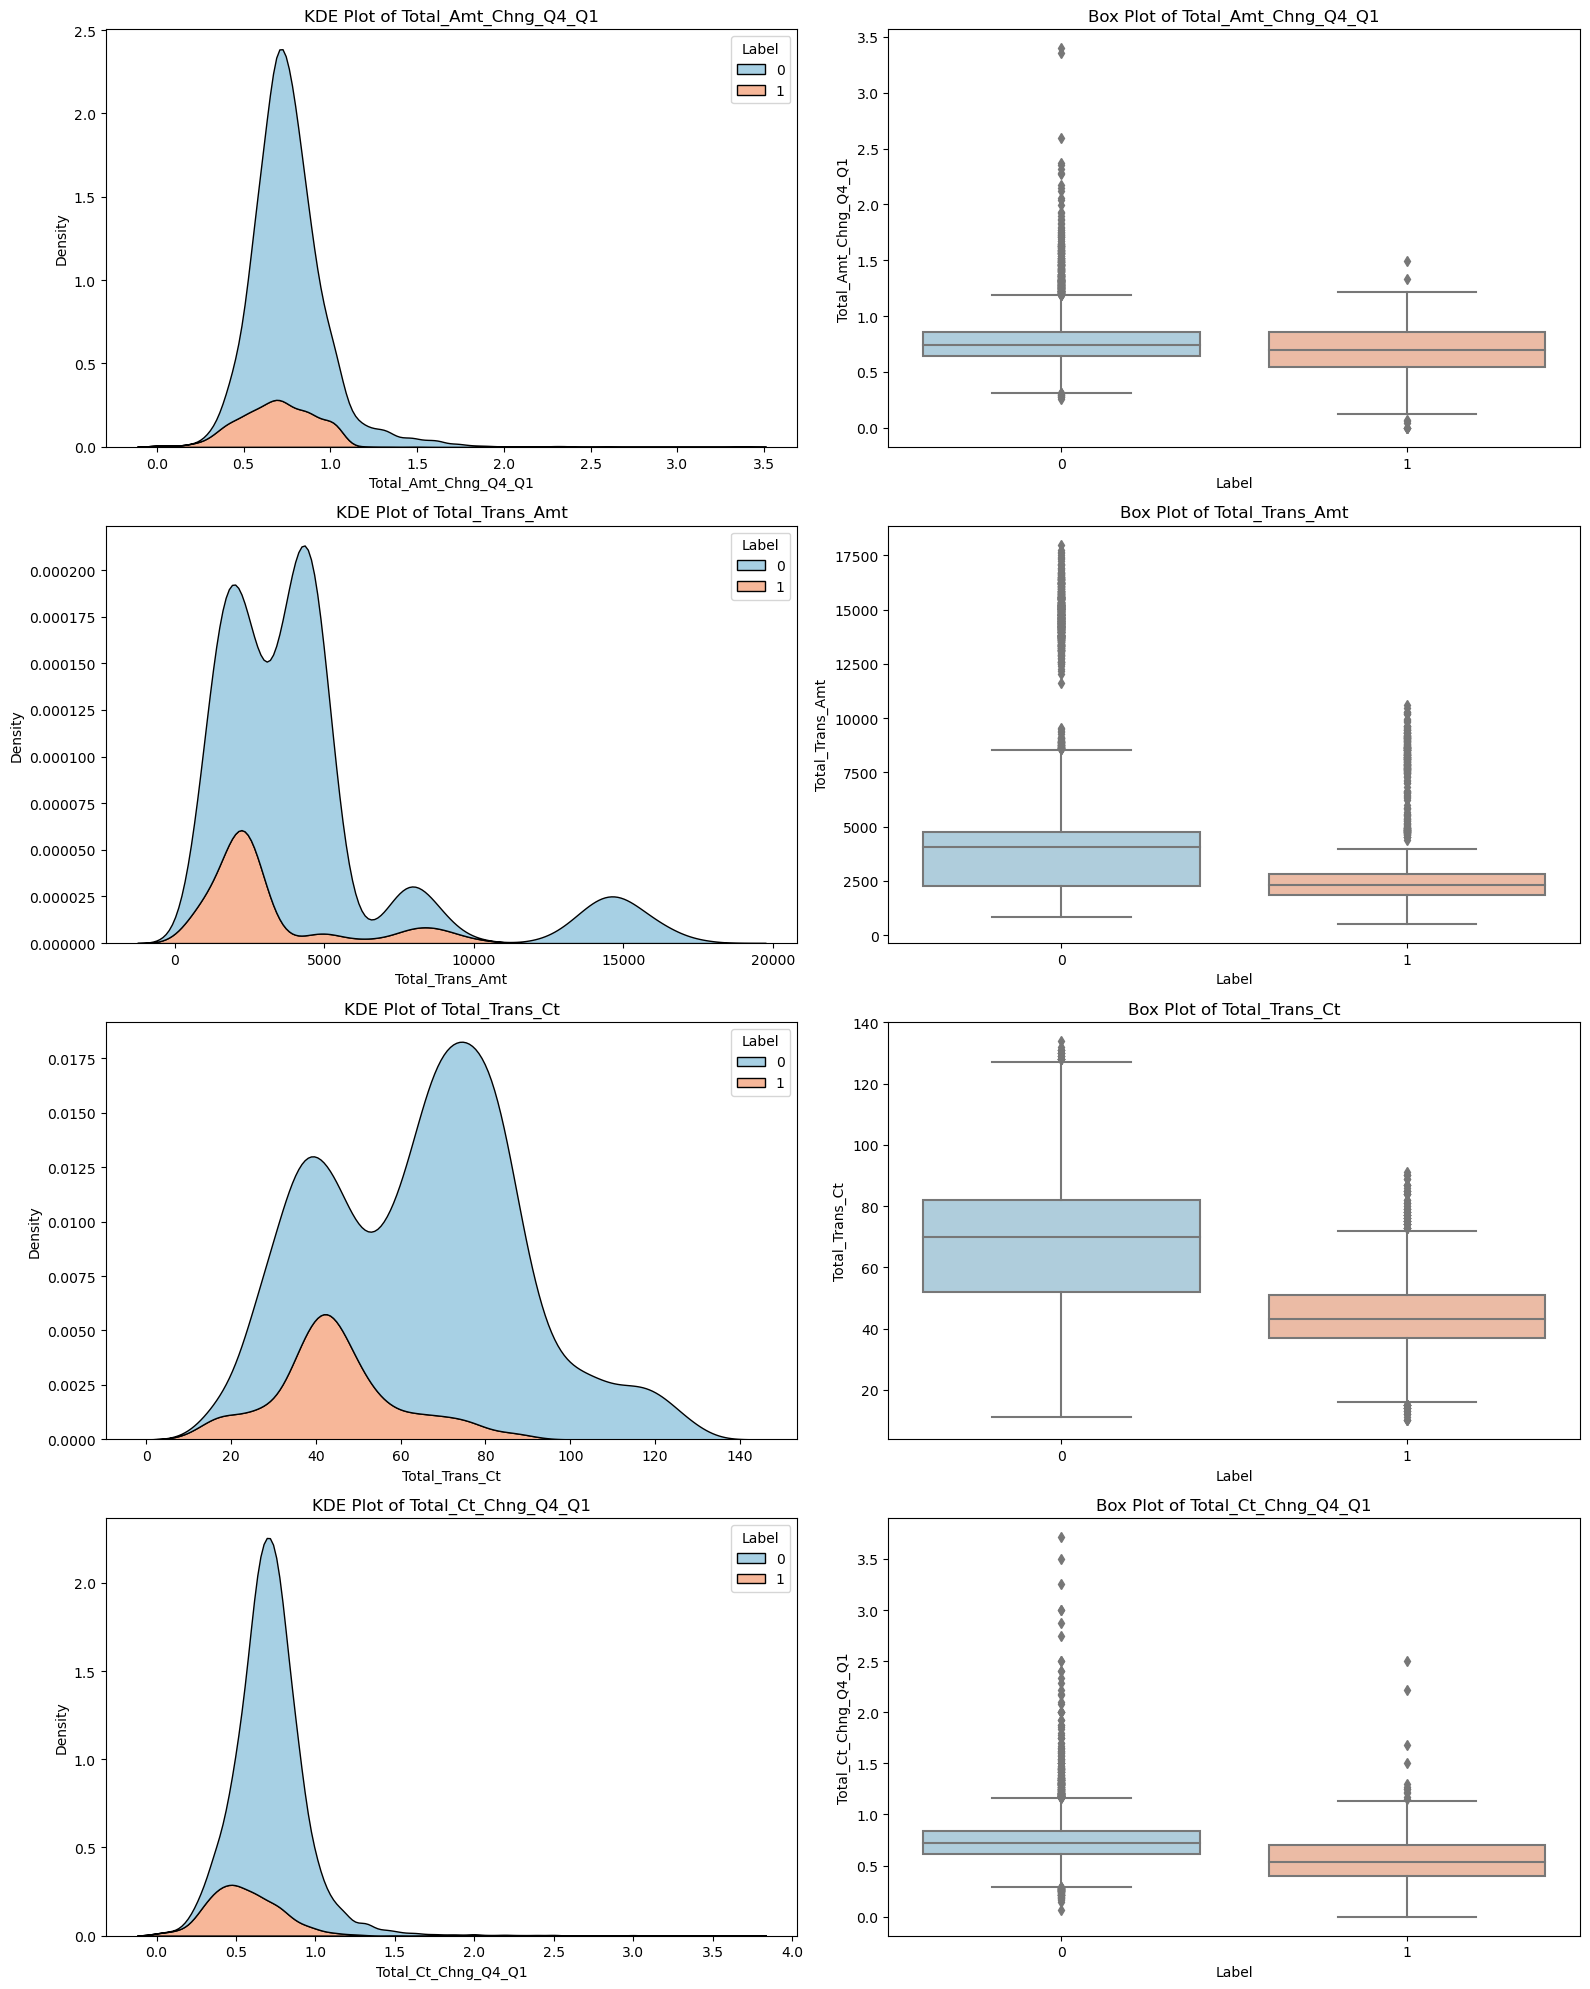

In [254]:

cols_visua = ['Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']

fig, ax = plt.subplots(ncols=2, nrows=len(cols_visua), figsize=(16, 5*len(cols_visua)))
                
df_visual = df_encl.copy()

for i, col in enumerate(cols_visua):
    Q3 = df_encl[col].quantile(0.99)
    df_encl = df_encl[df_encl[col] <= Q3]
    Q1 = df_encl[col].quantile(0.01)
    df_encl = df_encl[df_encl[col] >= Q1]
    # Vẽ KDE plot
    sns.kdeplot(data=df_visual, x=col, fill=True, alpha=1, 
                hue='Label', palette=("RdBu_r"), multiple='stack', ax=ax[i, 0])
    
    # Vẽ Box plot
    sns.boxplot(data=df_visual, y=col, x='Label', ax=ax[i, 1],
                palette=("RdBu_r"))

# Thiết lập tiêu đề cho mỗi biểu đồ
for i, col in enumerate(cols_visua):
    ax[i, 0].set_title(f'KDE Plot of {col}')
    ax[i, 1].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


In [255]:
# Drop cột clientnum vì nó không có ý nghĩa
df_enc = df_enc.drop(columns = ['CLIENTNUM'])

In [306]:
!pip install xgboost

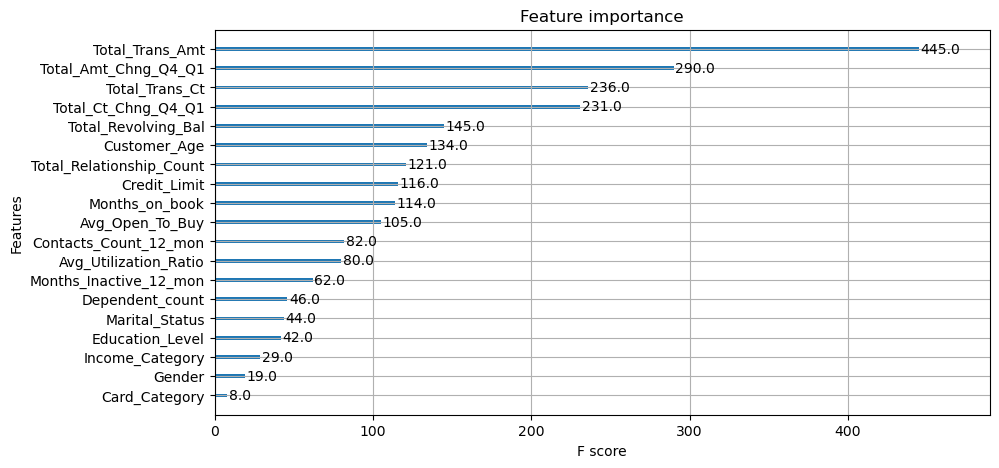

In [309]:
import xgboost as xgb
model = xgb.XGBClassifier()

x = df_enc.drop(columns = 'Label')
y = df_enc['Label']
model.fit(x, y)

plt.rcParams['figure.figsize'] = (10,5)
xgb.plot_importance(model, importance_type = 'weight')
plt.show()

In [262]:
# Xóa cột - không có ý nghĩa và cần thiết để chạy modeling
# Xóa cột AVg_Open_To_Buy: vì có cor với cột Credit_Limit = 1 và có mức ý nghĩa < cột Credit_Limit
df_enc.drop(columns = ['Avg_Open_To_Buy'])

,Label,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,1,3,1,1,1,1,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,0,49,2,5,2,2,2,1,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,0,51,1,3,2,1,3,1,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000
4,0,40,1,3,3,1,1,1,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000
5,0,44,1,2,2,1,4,1,36,3,1,2,4010.0,1247,1.376,1088,24,0.846,0.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,0,54,1,1,1,2,1,1,34,5,2,0,13940.0,2109,0.660,15577,114,0.754,0.151
10121,0,56,2,1,2,2,2,1,50,4,1,4,3688.0,606,0.570,14596,120,0.791,0.164
10122,0,50,1,2,2,2,4,1,40,3,2,3,4003.0,1851,0.703,15476,117,0.857,0.462
10124,1,44,2,1,1,1,2,1,36,5,3,4,5409.0,0,0.819,10291,60,0.818,0.000


# The Model

In [260]:
df_enc.columns

Index(['Label', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [264]:
df_eng = df_enc.copy()

In [265]:
y = df_eng[['Label']]
df_x = df_eng.iloc[:,1:18]
df_x

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct
0,45,1,3,1,1,1,1,39,5,1,3,12691.0,777,11914.0,1.335,1144,42
1,49,2,5,2,2,2,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33
2,51,1,3,2,1,3,1,36,4,1,0,3418.0,0,3418.0,2.594,1887,20
4,40,1,3,3,1,1,1,21,5,1,0,4716.0,0,4716.0,2.175,816,28
5,44,1,2,2,1,4,1,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,54,1,1,1,2,1,1,34,5,2,0,13940.0,2109,11831.0,0.660,15577,114
10121,56,2,1,2,2,2,1,50,4,1,4,3688.0,606,3082.0,0.570,14596,120
10122,50,1,2,2,2,4,1,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117
10124,44,2,1,1,1,2,1,36,5,3,4,5409.0,0,5409.0,0.819,10291,60


In [272]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(df_x)
x.shape

(7081, 17)

<Axes: xlabel='Label', ylabel='count'>

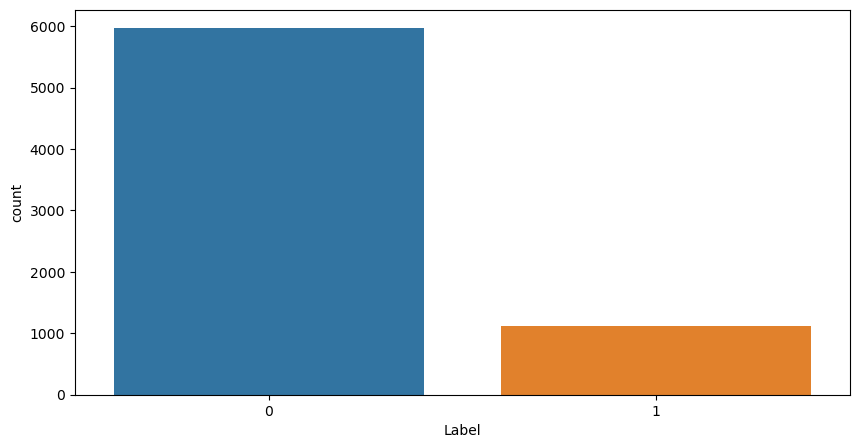

In [269]:
sns.countplot(x = df_enc['Label'],data = df_enc)

In [320]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import warnings
import plotly.express as px

warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print("Before undersampling - 0s: ", y_train[y_train['Label']==0].count())
print("Before undersampling - 1s: ", y_train[y_train['Label']==1].count())
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
print("After undersampling - 0s: ", y_train_under[y_train_under['Label']==0].count())
print("After undersampling - 1s: ", y_train_under[y_train_under['Label']==1].count())
scaled_inputs = X_train_under
targets = y_train_under
fig  = px.histogram(targets, x="Label", color="Label")
fig.show()

Before undersampling - 0s:  Label    4151
dtype: int64
Before undersampling - 1s:  Label    805
dtype: int64
After undersampling - 0s:  Label    805
dtype: int64
After undersampling - 1s:  Label    805
dtype: int64


In [ ]:
sắp xếp bảng theo cột Odds_ratio theo thứ tự giảm dần, giúp dễ dàng nhìn thấy những biến có tác động mạnh nhất đến xác suất xảy ra sự kiện trong mô hình hồi quy logistic.

#### Logistic Regression

In [321]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np

y_train_under = y_train_under.values.ravel()  

print(f"y_train_under shape after ravel: {y_train_under.shape}")

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=10, min_samples_split=20, random_state=0)
rf_model.fit(X_train_under, y_train_under)

y_pred_rf = rf_model.predict(X_train_under)

print(classification_report(y_train_under, y_pred_rf))

accuracy_rf = accuracy_score(y_train_under, y_pred_rf)
print(f'Accuracy: {accuracy_rf:.2f}')

#Tính toán độ quan trọng của các biến
feature_importances = rf_model.feature_importances_
features = df_x.columns

importances_df_rf = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

importances_df_rf = importances_df_rf.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importances_df_rf)


y_train_under shape after ravel: (1610,)
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       805
           1       0.92      0.93      0.93       805

    accuracy                           0.93      1610
   macro avg       0.93      0.93      0.93      1610
weighted avg       0.93      0.93      0.93      1610

Accuracy: 0.93
                     Feature  Importance
0             Total_Trans_Ct    0.271330
1        Total_Revolving_Bal    0.233553
2            Total_Trans_Amt    0.218285
3   Total_Relationship_Count    0.062374
4       Total_Amt_Chng_Q4_Q1    0.055363
5     Months_Inactive_12_mon    0.051274
6               Credit_Limit    0.027980
7            Avg_Open_To_Buy    0.024272
8      Contacts_Count_12_mon    0.017107
9               Customer_Age    0.013736
10            Months_on_book    0.010167
11                    Gender    0.004276
12            Marital_Status    0.003456
13           Dependent_count    0.002775
14

### Decision

In [291]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd


tree_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, min_samples_split=20, random_state=0)
tree_model.fit(X_train_under, y_train_under)

y_pred_tree = tree_model.predict(X_train_under)

print(classification_report(y_train_under, y_pred_tree))

accuracy_tree = accuracy_score(y_train_under, y_pred_tree)
print(f'Accuracy: {accuracy_tree:.2f}')




              precision    recall  f1-score   support

           0       0.93      0.89      0.91       805
           1       0.90      0.94      0.92       805

    accuracy                           0.92      1610
   macro avg       0.92      0.92      0.92      1610
weighted avg       0.92      0.92      0.92      1610

Accuracy: 0.92


In [293]:
# Bước 2: Tính toán độ quan trọng của các biến
feature_importances = tree_model.feature_importances_
features = df_x.columns

importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

importances_df = importances_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importances_df)

                     Feature  Importance
0             Total_Trans_Ct    0.553492
1            Total_Trans_Amt    0.213405
2        Total_Revolving_Bal    0.117535
3   Total_Relationship_Count    0.057754
4     Months_Inactive_12_mon    0.033765
5       Total_Amt_Chng_Q4_Q1    0.020638
6      Contacts_Count_12_mon    0.002427
7               Credit_Limit    0.000984
8             Marital_Status    0.000000
9            Income_Category    0.000000
10             Card_Category    0.000000
11            Months_on_book    0.000000
12                    Gender    0.000000
13           Education_Level    0.000000
14           Avg_Open_To_Buy    0.000000
15           Dependent_count    0.000000
16              Customer_Age    0.000000


In [307]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

y_train_under = y_train_under.values.ravel()  # Hoặc sử dụng flatten()

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_leaf=10, min_samples_split=20, random_state=0)
rf_model.fit(X_train_under, y_train_under)

y_pred_rf = rf_model.predict(X_train_under)

print(classification_report(y_train_under, y_pred_rf))

accuracy_rf = accuracy_score(y_train_under, y_pred_rf)
print(f'Accuracy: {accuracy_rf:.2f}')

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       805
           1       0.93      0.95      0.94       805

    accuracy                           0.94      1610
   macro avg       0.94      0.94      0.94      1610
weighted avg       0.94      0.94      0.94      1610

Accuracy: 0.94


In [306]:
# Tính toán độ quan trọng của các biến
feature_importances = rf_model.feature_importances_
features = df_x.columns

importances_df_rf = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

importances_df_rf = importances_df_rf.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importances_df_rf)

                     Feature  Importance
0             Total_Trans_Ct    0.284459
1            Total_Trans_Amt    0.237645
2        Total_Revolving_Bal    0.206092
3       Total_Amt_Chng_Q4_Q1    0.068808
4   Total_Relationship_Count    0.059332
5     Months_Inactive_12_mon    0.032365
6            Avg_Open_To_Buy    0.029718
7               Credit_Limit    0.026768
8      Contacts_Count_12_mon    0.018005
9               Customer_Age    0.010652
10            Months_on_book    0.008624
11                    Gender    0.005006
12           Dependent_count    0.003545
13            Marital_Status    0.003527
14           Education_Level    0.002485
15           Income_Category    0.002288
16             Card_Category    0.000681
